In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from pprint import pprint
import sys
sys.path.append("../")
from utils import branching_ratios
import matplotlib
import itertools
import vector

In [2]:
particle_infos = {e: pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_particles.csv") for e in [5, 10, 20, 50, 100]}
event_infos = {e: pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_event_info.csv") for e in [5, 10, 20, 50, 100]}

In [4]:
particle_infos[5].head(15)

,event_num,pdg,E,px,py,pz,polx,poly,polz
0,0,1000080160,14.895082,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,0,16,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
2,0,15,3.903152,-0.404374,-0.448013,3.422466,-0.128915,0.116357,-0.984806
3,0,11,1.192467,0.221610,-0.264795,1.141380,NaN,NaN,NaN
4,0,-12,2.320251,-0.895265,-0.402346,2.102423,NaN,NaN,NaN
5,0,16,0.390469,0.269274,0.219157,0.178684,NaN,NaN,NaN
6,1,1000080160,14.895082,0.000000,0.000000,0.000000,NaN,NaN,NaN
7,1,16,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
8,1,15,4.783084,0.080610,-0.132914,4.438090,-0.029930,-0.018152,-0.999387
9,1,-211,2.350075,-0.774235,0.276101,2.197203,NaN,NaN,NaN


In [5]:
event_infos[5].head(15)

,event_num,cc,dis,qel,res,nuel,coh,dfr,imd,xsec,...,ys,W,Ws,Q2,Q2s,charm,En,pxn,pyn,pzn
0,0,True,False,True,False,False,False,False,False,2.659422,...,0.194847,1.136323,0.938270,1.650039,1.650039,False,0.922758,0.168236,0.040486,0.044710
1,1,True,False,True,False,False,False,False,False,2.659422,...,0.041841,0.997981,0.938270,0.292935,0.292935,False,0.922568,-0.079957,-0.163760,0.063590
2,2,True,False,True,False,False,False,False,False,2.659422,...,0.134304,0.972196,0.938270,1.303816,1.303816,False,0.922614,0.150884,-0.062280,-0.096672
3,3,True,False,False,True,False,False,False,False,1.367215,...,0.248554,1.341427,1.241349,1.421893,1.421893,False,0.925292,-0.004369,-0.138366,0.068142
4,4,True,False,False,True,False,False,False,False,0.170902,...,0.178728,1.288055,1.287132,0.900589,0.900589,False,0.938270,0.000000,0.000000,0.000000
5,5,True,False,True,False,False,False,False,False,2.659422,...,0.172173,0.837062,0.938270,1.531982,1.531982,False,0.922914,-0.012866,0.165619,0.000496
6,6,True,False,True,False,False,False,False,False,2.659422,...,0.046490,0.963279,0.938270,0.365778,0.365778,False,0.922348,0.206702,0.014454,-0.021510
7,7,True,False,False,True,False,False,False,False,0.459604,...,0.257150,1.385521,0.993943,1.558400,1.558400,False,0.920449,0.216610,0.013803,0.222190
8,8,True,False,True,False,False,False,False,False,2.659422,...,0.027466,0.904259,0.938270,0.206097,0.206097,False,0.922281,-0.115837,0.147011,-0.101309
9,9,True,False,True,False,False,False,False,False,2.659422,...,0.080651,1.057482,0.938270,0.623873,0.623873,False,0.923499,0.027511,-0.009777,0.101921


In [17]:
event_infos[5].columns

Index(['event_num', 'cc', 'dis', 'qel', 'res', 'nuel', 'coh', 'dfr', 'imd',
       'xsec', 'diffxsec', 'hitnuc', 'hitqrk', 'sea', 'resid', 'x', 'xs', 'y',
       'ys', 'W', 'Ws', 'Q2', 'Q2s', 'charm', 'En', 'pxn', 'pyn', 'pzn'],
      dtype='object')

In [3]:
def sanity_checks(particle_info: pd.DataFrame):
    # Check if there are any events where two taus are produced
    # There should not be any
    assert not (particle_info[np.abs(particle_info['pdg']) == 15].groupby("event_num").count() > 1).any().any()

    taus = particle_info[np.abs(particle_info["pdg"]) == 15]
    # assert (taus["event_num"] == np.arange(len(taus))).all()
    print("Number of events:", len(taus))
    # Print the 4-momentum conservation between tau and its decay products
    print(
        np.unique(
            np.isclose(
                particle_info
                    .drop(["pdg", "polx", "poly", "polz"], axis=1)
                    .groupby("event_num")
                    .nth[3:]
                    .groupby("event_num")
                    .sum(), 
                taus
                    .set_index("event_num")
                    .drop(["pdg", "polx", "poly", "polz"], axis=1)
                , rtol=0.01)
            .sum(axis=1)
            , return_counts=True
        )
    )

    # Print the branching ratios
    br = branching_ratios(particle_info.groupby("event_num").nth[3:])
    pprint(br, sort_dicts=False)
    # Geant4 only implements 6 decay modes for the tau
    assert len(br) == 6, br

    branching_ratios(particle_info.groupby("event_num").nth[3:])

    # Check that for every event with a tau there is a tau neutrino, and vice versa for anti-tau
    # TODO speed up this code by removing the for-loop
    assert particle_info.groupby("event_num")["pdg"].agg(lambda values, index: np.all(values[np.abs(values) == 15] * values[np.abs(values) == 16] > 0), engine="numba").all()

    # Check that the nucleus is either 1000080160 or 2212
    nucleus = particle_info.groupby("event_num").first().iloc[:, 0]
    assert (nucleus == 1000080160).sum() + (nucleus == 2212).sum() == len(nucleus), nucleus

    # Check that the polarization vectors for the tau are either 0 or 1 in magnitude
    tau_pol_mag = taus[["polx", "poly", "polz"]].pow(2).sum(axis=1)
    assert np.isclose(tau_pol_mag[tau_pol_mag != 0], 1).all()
    assert not tau_pol_mag.isnull().any()
    print("Number of taus with 0 polarization:", (tau_pol_mag == 0).sum())
    print("number of events with 0 polx, poly, polz:", (particle_info.query("pdg == 15")[["polx", "poly", "polz"]] == 0).all(axis=1).sum())
    print("Number of taus with NaN polarization:", (tau_pol_mag.isnull()).sum())
    print("Number of taus with 1 polarization:", np.isclose(tau_pol_mag, 1).sum())

    incoming_nutau = particle_info.groupby("event_num").nth(1)
    # Check that the incoming neutrinos are tau neutrinos
    assert set(incoming_nutau["pdg"].unique().tolist()) <= {16, -16}
    # Check that the polarization vectors for all incoming neutrinos are 0
    assert (particle_info.groupby("event_num").nth(1)[["polx", "poly", "polz"]] == 0).all().all()
    # Check that all incoming neutrinos have the same 4-momenta
    assert (incoming_nutau[["E", "px", "py", "pz"]] == incoming_nutau.iloc[0][["E", "px", "py", "pz"]]).all(axis=0).all()
    
    # Check that the polarization vectors for all other particles are 0
    assert particle_info.drop(incoming_nutau.index, axis=0).query("pdg != 15")[["polx", "poly", "polz"]].isnull().all().all(), particle_info.drop(incoming_nutau.index, axis=0).query("(pdg != 15) and (polx.notnull() or poly.notnull() or polz.notnull())")

for e, particle_info in particle_infos.items():
    print(f"Energy: {e} GeV")
    sanity_checks(particle_info)
    print()

Energy: 5 GeV
Number of events: 17881
(array([2, 3, 4]), array([   57,  1352, 16472]))
{(-211, 16, 111): 0.2819752810245512,
 (-12, 11, 16): 0.19646552206252446,
 (-14, 13, 16): 0.19098484424808457,
 (-211, 16): 0.12762149767910072,
 (-211, -211, 16, 211): 0.10368547620379173,
 (-211, 16, 111, 111): 0.09926737878194732}
Number of taus with 0 polarization: 0
number of events with 0 polx, poly, polz: 0
Number of taus with NaN polarization: 0
Number of taus with 1 polarization: 17881

Energy: 10 GeV
Number of events: 42493
(array([2, 3, 4]), array([   66,  2509, 39918]))
{(-211, 16, 111): 0.28416445061539547,
 (-12, 11, 16): 0.1957028216412115,
 (-14, 13, 16): 0.18989009954580754,
 (-211, 16): 0.12303202880474431,
 (-211, -211, 16, 211): 0.1052408632009978,
 (-211, 16, 111, 111): 0.10196973619184337}
Number of taus with 0 polarization: 0
number of events with 0 polx, poly, polz: 0
Number of taus with NaN polarization: 0
Number of taus with 1 polarization: 42493

Energy: 20 GeV
Number of e

## Event level information

In [4]:
def sanity_check_event(event_info: pd.DataFrame):
    # Q2 should be the same as Q2s
    assert np.allclose(event_info.loc[:, "Q2"], event_info.loc[:, "Q2s"])

    # Cross section should be > 0
    assert event_info["xsec"].all() > 0
    # Differential cross section should be > 0
    assert event_info["diffxsec"].all() > 0
    # All events should be charge-current
    assert event_info["cc"].all()
    
    # Number of events for each interaction type
    print("E =", e, "GeV")
    print(event_info.loc[:, ["dis", "qel", "res", "nuel", "coh", "dfr", "imd"]].sum(axis=0))
    # All events should be one of the interaction types
    assert (event_info[["dis", "qel", "res", "nuel", "coh", "dfr", "imd"]].sum(axis=1) == 1).all()
    
    # Hit nucleon should always be a proton or a neutron. For coh, imd, nuel, it should be 0.
    assert event_info.loc[1-event_info.loc[:, ["coh", "imd", "nuel"]].any(axis=1), "hitnuc"].isin({2212, 2112}).all(), event_info["hitnuc"].unique()
    assert (event_info.loc[event_info.loc[:, ["coh", "imd", "nuel"]].any(axis=1), "hitnuc"] == 0).all()
    
    # Hit quark should always be a u, d, s, c, or b quark. For eveything except dis, it should be 0.
    assert event_info.loc[event_info.loc[:, "dis"], "hitqrk"].abs().isin({1, 2, 3, 4, 5}).all(), event_info["hitqrk"].unique()
    assert (event_info.loc[~event_info.loc[:, "dis"], "hitqrk"] == 0).all()
    
    # sea should be True or False. It should only be set for dis
    assert event_info.loc[event_info.loc[:, "dis"], "sea"].isin({True, False}).all()
    assert (event_info.loc[~event_info.loc[:, "dis"], "sea"] == False).all()

    # resid should be 0-17 for res events, -99 for the other events.
    assert event_info.loc[event_info["res"], "resid"].isin(range(18)).all()
    assert (event_info.loc[~event_info["res"], "resid"] == -99).all()
    # Here are all resonande IDs (from https://github.com/GENIE-MC/Generator/blob/master/src/Framework/ParticleData/BaryonResonance.h#L24)
    # kNoResonance = -1,
    # kP33_1232    =  0,
    # kS11_1535    =  1,
    # kD13_1520    =  2,
    # kS11_1650    =  3,
    # kD13_1700    =  4,
    # kD15_1675    =  5,
    # kS31_1620    =  6,
    # kD33_1700    =  7,
    # kP11_1440    =  8,
    # kP33_1600    =  9,
    # kP13_1720    = 10,
    # kF15_1680    = 11,
    # kP31_1910    = 12,
    # kP33_1920    = 13,
    # kF35_1905    = 14,
    # kF37_1950    = 15,
    # kP11_1710    = 16,
    # kF17_1970    = 17
    
    # xs should be between 0 and 1
    assert (event_info["xs"] >= 0).all(), event_info[event_info["xs"] < 0]
    assert (event_info["xs"] <= 1).all(), event_info.loc[event_info["xs"] > 1, "xs"]
    # This is not necessarily true for x, since it uses a standard nucleon mass and no nuclear corrections

    # Ws should be greater than 0
    assert (event_info["Ws"] > 0).all(), event_info[event_info["Ws"] <= 0]
    # This is not necessarily true for W

    # Q2 should be greater than 0
    assert (event_info["Q2"] > 0).all(), event_info[event_info["Q2"] <= 0]
    
    # charm should be either True or False
    assert event_info["charm"].isin({True, False}).all()

    # Maybe do a check of ys here...
    # Number (and fraction) of charm events
    print(f"{event_info['charm'].sum()} charm events out of {len(event_info)} ({event_info['charm'].mean() * 100:.2f}%)")

    # Print the counts of each quark that is hit
    print("Quarks that are hit:")
    print(event_info["hitqrk"].value_counts())

    # Check that the nucleon 4-momentum is always defined
    assert not event_info.loc[:, ["En", "pxn", "pyn", "pzn"]].isnull().any().any()
    print("Number of events with incorrect nucleon mass:", (event_info["En"] == 0).sum())

for e, event_info in event_infos.items():
    print(f"Energy: {e} GeV")
    sanity_check_event(event_info)
    print()

Energy: 5 GeV
E = 5 GeV
dis        0
qel     9682
res     8199
nuel       0
coh        0
dfr        0
imd        0
dtype: int64
0 charm events out of 17881 (0.00%)
Quarks that are hit:
hitqrk
0    17881
Name: count, dtype: int64
Number of events with incorrect nucleon mass: 0

Energy: 10 GeV
E = 10 GeV
dis     21386
qel      7006
res     14101
nuel        0
coh         0
dfr         0
imd         0
dtype: int64
189 charm events out of 42493 (0.44%)
Quarks that are hit:
hitqrk
1    21386
0    21107
Name: count, dtype: int64
Number of events with incorrect nucleon mass: 0

Energy: 20 GeV
E = 20 GeV
dis     45583
qel      3396
res      7303
nuel        0
coh         0
dfr         0
imd         0
dtype: int64
1532 charm events out of 56282 (2.72%)
Quarks that are hit:
hitqrk
 1    44649
 0    10699
-2      686
 3      248
Name: count, dtype: int64
Number of events with incorrect nucleon mass: 0

Energy: 50 GeV
E = 50 GeV
dis     62488
qel      1166
res      2633
nuel        0
coh        76

In [3]:
def plot_event_distribution(event_infos: dict[int, pd.DataFrame], colname: str, bins: dict[int, np.ndarray] = None):
    fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

    if bins is None:
        bins = {e: np.linspace(0, e, 100) for e in event_infos.keys()}

    for (e, p), ax in zip(event_infos.items(), axs):
        # Plot the W distributions for the different interaction types
        for int_type in ["dis", "qel", "res", "coh"]:
            p.loc[p[int_type], colname].hist(bins=bins[e], ax=ax, alpha=0.5, label=int_type)
        
        ax.set(title=f"E = {e} GeV", xlabel=colname, ylabel="Counts")
        ax.grid(True)
        ax.legend()

    return fig, axs

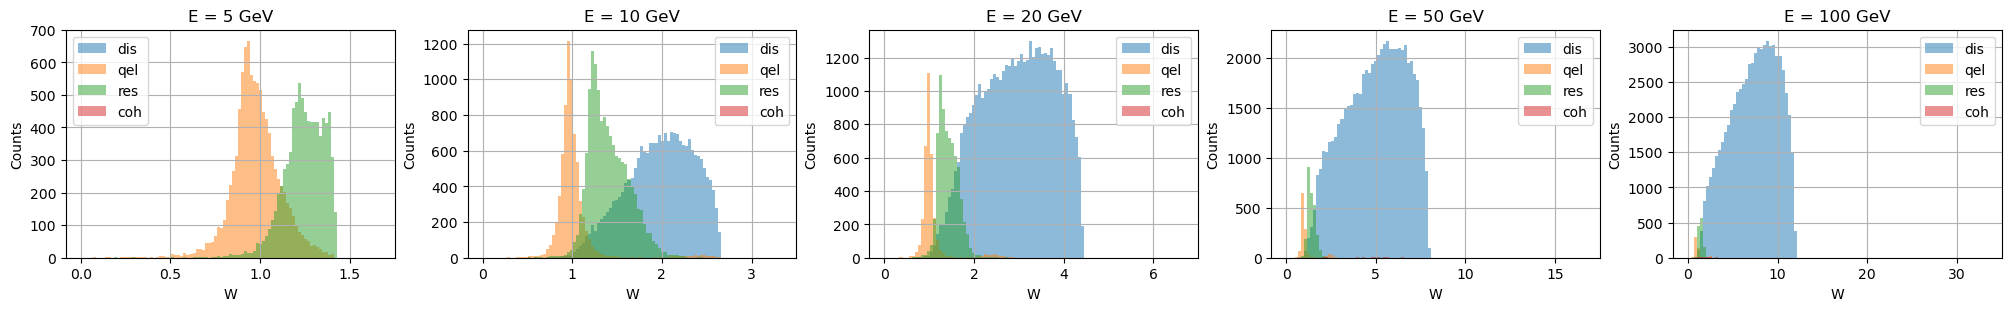

In [9]:
plot_event_distribution(
    event_infos, 
    "W", 
    bins={e: np.linspace(0, e/3, 100) for e in event_infos.keys()}
);

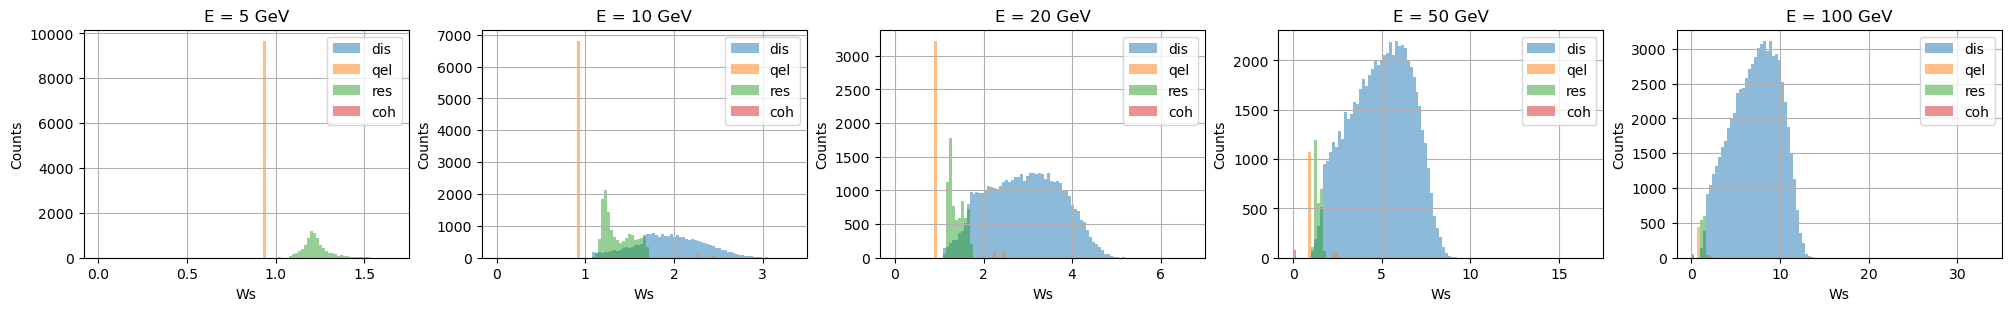

In [10]:
plot_event_distribution(
    event_infos, 
    "Ws", 
    bins={e: np.linspace(0, e/3, 100) for e in event_infos.keys()}
);

This looks much more like it should be for the quasielastic interactions, since is should have only one specific energy. The W for resonance scattering also looks better, since it is a combination of peaks close to resonance masses.

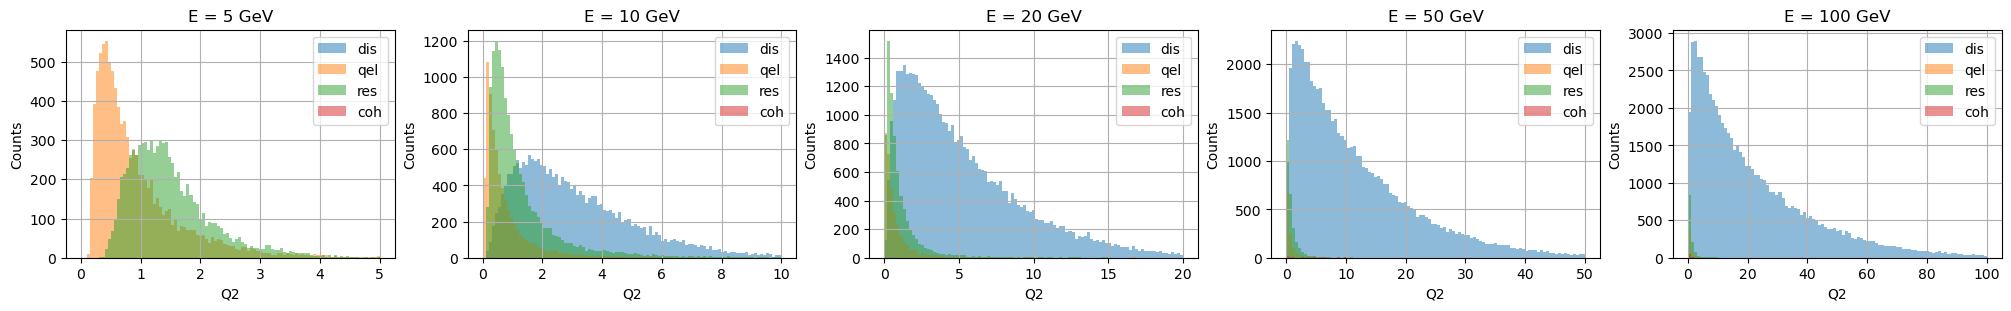

In [11]:
plot_event_distribution(
    event_infos, 
    "Q2", 
);

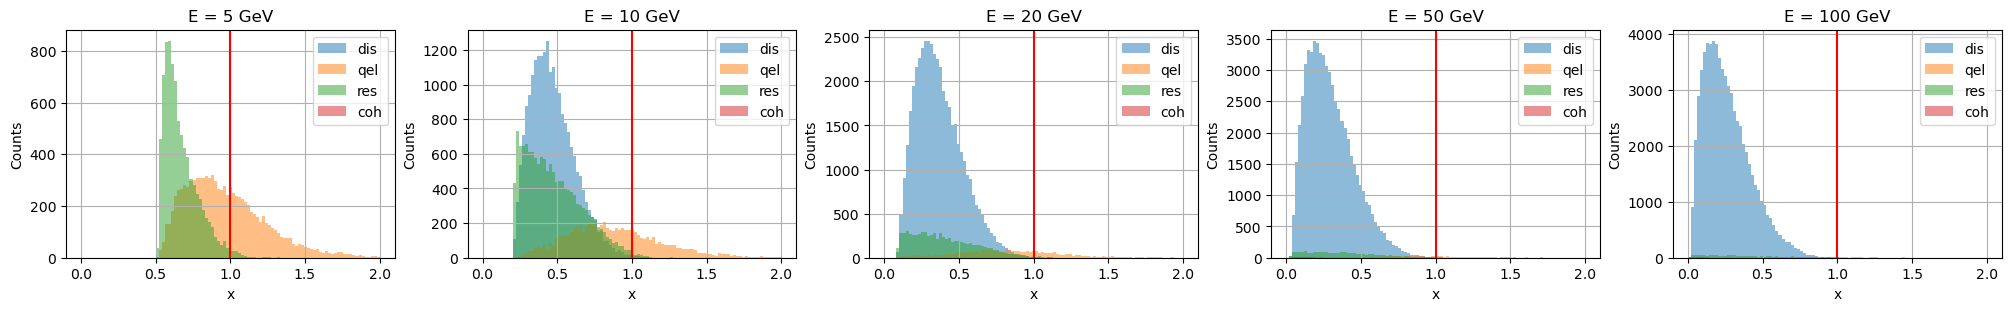

In [12]:
fig, axs = plot_event_distribution(
    event_infos, 
    "x", 
    bins={e: np.linspace(0, 2, 100) for e in event_infos.keys()}
)
for ax in axs:
    ax.axvline(1, c="r")

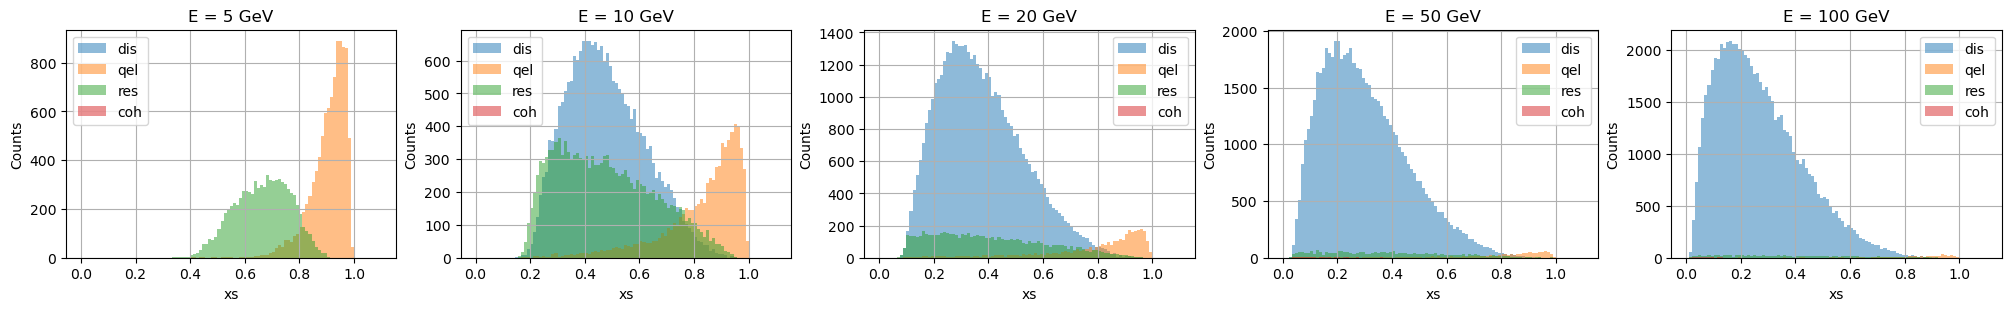

In [13]:
plot_event_distribution(
    event_infos, 
    "xs", 
    bins={e: np.linspace(0, 1.1, 100) for e in event_infos.keys()}
);

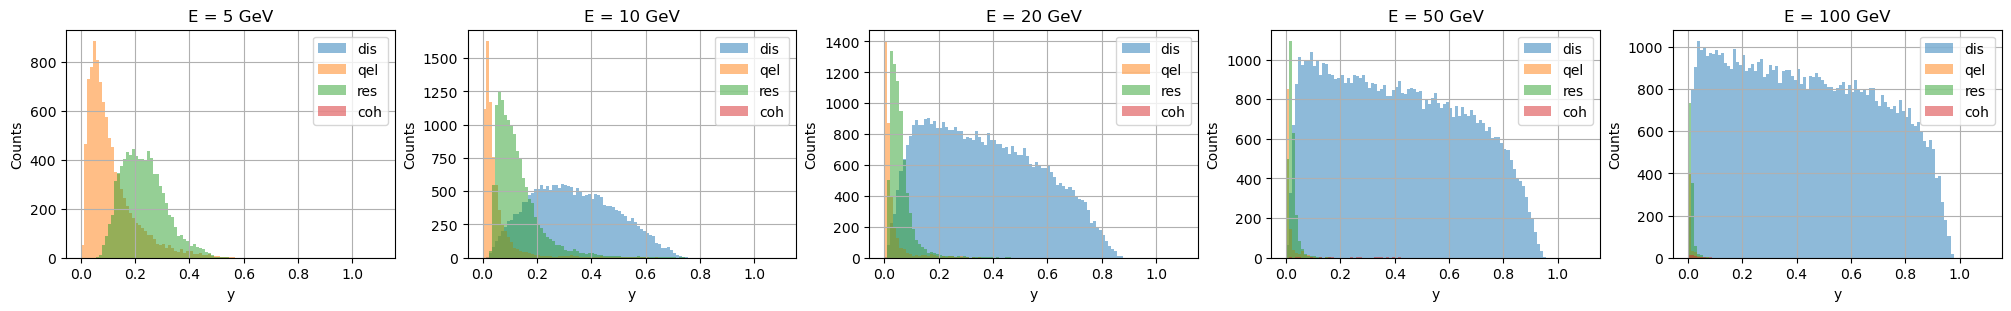

In [14]:
plot_event_distribution(
    event_infos, 
    "y", 
    bins={e: np.linspace(0, 1.1, 100) for e in event_infos.keys()}
);

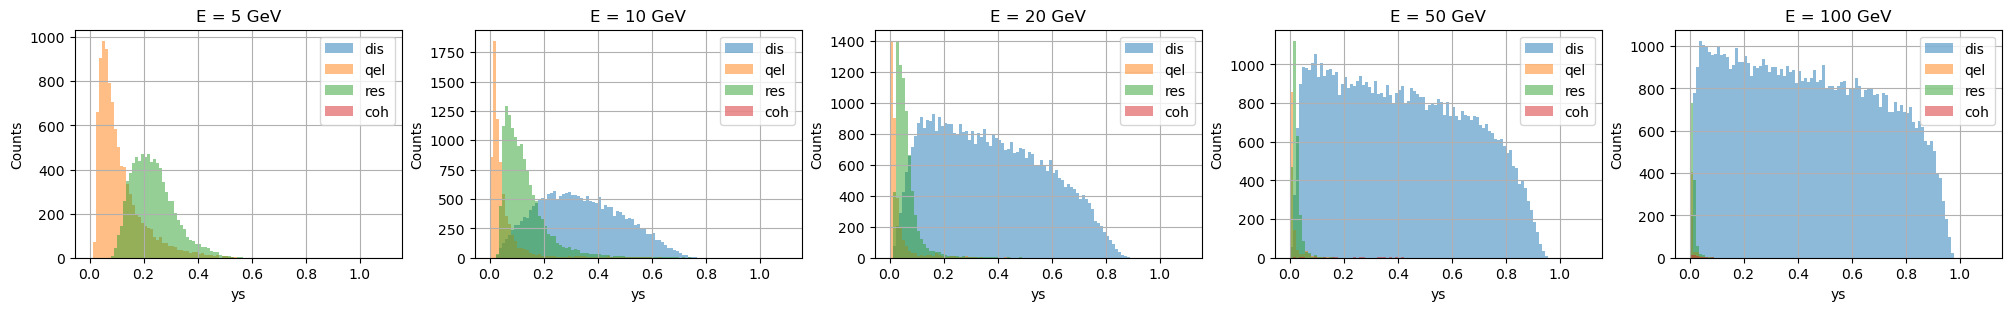

In [15]:
plot_event_distribution(
    event_infos, 
    "ys", 
    bins={e: np.linspace(0, 1.1, 100) for e in event_infos.keys()}
);

(<Figure size 2000x300 with 5 Axes>,
 array([<Axes: title={'center': 'E = 5 GeV'}, xlabel='En', ylabel='Counts'>,
        <Axes: title={'center': 'E = 10 GeV'}, xlabel='En', ylabel='Counts'>,
        <Axes: title={'center': 'E = 20 GeV'}, xlabel='En', ylabel='Counts'>,
        <Axes: title={'center': 'E = 50 GeV'}, xlabel='En', ylabel='Counts'>,
        <Axes: title={'center': 'E = 100 GeV'}, xlabel='En', ylabel='Counts'>],
       dtype=object))

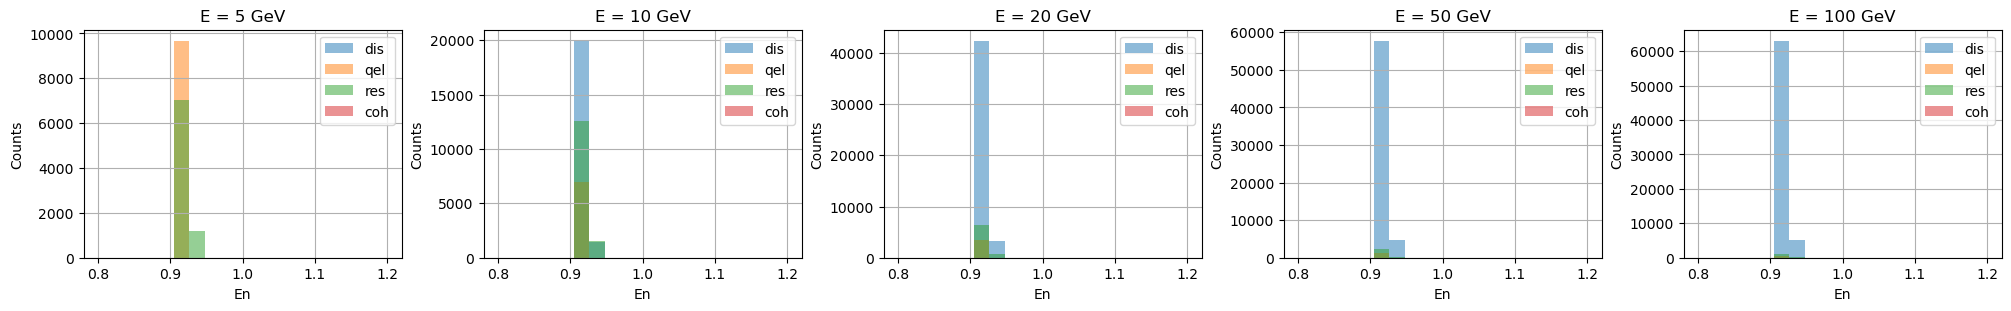

In [8]:
plot_event_distribution(
    event_infos,
    "En",
    bins={e: np.linspace(0.8, 1.2, 20) for e in event_infos.keys()}
)

In [4]:
def boost_rotated_4m(nutau4m, nucleon4m, tau4m):
    # Replace the nucleon 4-momentum vectors that are incorrect. These are not dis, res or qel events, so they should not appear in the real calculations,
    zero_nucleons = nucleon4m.E == 0
    nucleon_arr = np.array([nucleon4m.E, nucleon4m.px, nucleon4m.py, nucleon4m.pz])
    nucleon_arr[0, zero_nucleons] = 0.98318
    nucleon4m = vector.array({"E": nucleon_arr[0, :], "px": nucleon_arr[1, :], "py": nucleon_arr[2, :], "pz": nucleon_arr[3, :]})

    # Boost all vectors such that the nucleon is at rest
    tau4m_boosted = tau4m.boostCM_of(nucleon4m)
    nucleon4m_boosted = nucleon4m.boostCM_of(nucleon4m)
    nutau4m_boosted = nutau4m.boostCM_of(nucleon4m)
    
    assert np.allclose(nucleon4m_boosted.px, 0), nucleon4m_boosted.px[~np.isclose(nucleon4m_boosted.px, 0)]
    assert np.allclose(nucleon4m_boosted.py, 0), nucleon4m_boosted.py[~np.isclose(nucleon4m_boosted.py, 0)]
    assert np.allclose(nucleon4m_boosted.pz, 0), nucleon4m_boosted.py[~np.isclose(nucleon4m_boosted.py, 0)]

    # get the angles to rotate nutau4m_boosted so that it is aligned with the z axis, pointing towards positive z
    phi = nutau4m_boosted.phi
    theta = nutau4m_boosted.theta

    # Rotate nutau4m_boosted so that it is aligned with the z axis, pointing towards positive z
    nutau4m_rotated = nutau4m_boosted.rotateZ(-phi).rotateY(-theta)
    # Rotate all other momentum vectors, thereby preserving the 4-momentum conservation
    tau4m_rotated = tau4m_boosted.rotateZ(-phi).rotateY(-theta)
    nucleon4m_rotated = nucleon4m_boosted.rotateZ(-phi).rotateY(-theta)

    assert np.allclose(nutau4m_rotated.px, 0), nutau4m_rotated.px[~np.isclose(nutau4m_rotated.px, 0)]
    assert np.allclose(nutau4m_rotated.py, 0), nutau4m_rotated.py[~np.isclose(nutau4m_rotated.py, 0)]
    assert np.allclose(nutau4m_rotated.E, nutau4m_rotated.pz), nutau4m_rotated[~np.isclose(nutau4m_rotated.pz, nutau4m_rotated.E)]

    assert np.allclose(nucleon4m_rotated.px, 0)
    assert np.allclose(nucleon4m_rotated.py, 0)
    assert np.allclose(nucleon4m_rotated.pz, 0)
    # Q^2
    assert np.allclose(-(nutau4m_rotated - tau4m_rotated)**2, -(nutau4m - tau4m)**2)
    return nutau4m_rotated, nucleon4m_rotated, tau4m_rotated

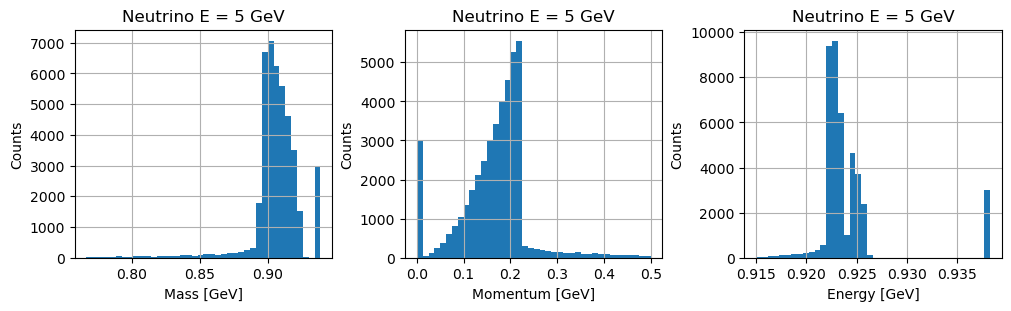

In [13]:
fig, axs = plt.subplots(
    # nrows=3, 
    # ncols=len(event_infos), 
    ncols=3,
    figsize=(10, 3),
    # figsize=(4*len(event_infos), 9), 
    layout="constrained"
)

# Calculate the mass of the nucleon using W and Q2
# for e, ax_col in zip(event_infos.keys(), axs):
ev = event_infos[10]

# Calculate mass using W and Ws
nucleon4m = vector.array({"E": ev["En"], "px": ev["pxn"], "py": ev["pyn"], "pz": ev["pzn"]})

bins = 40
# Plot histograms
axs[0].hist(nucleon4m.M, bins=bins)
axs[0].set(xlabel="Mass [GeV]")

axs[1].hist(nucleon4m.p, bins=bins)
axs[1].set(xlabel="Momentum [GeV]")

axs[2].hist(nucleon4m.E, bins=bins)
axs[2].set(xlabel="Energy [GeV]")
# ax.hist(M, bins=bins, alpha=0.5, label="W")
# ax.hist(Ms, bins=bins, alpha=0.5, label="Ws")

for ax in axs:
    ax.set(title=f"Neutrino E = 5 GeV", ylabel="Counts")
    ax.grid(True)


The y and ys distributions are very similar to each other but not exactly the same.

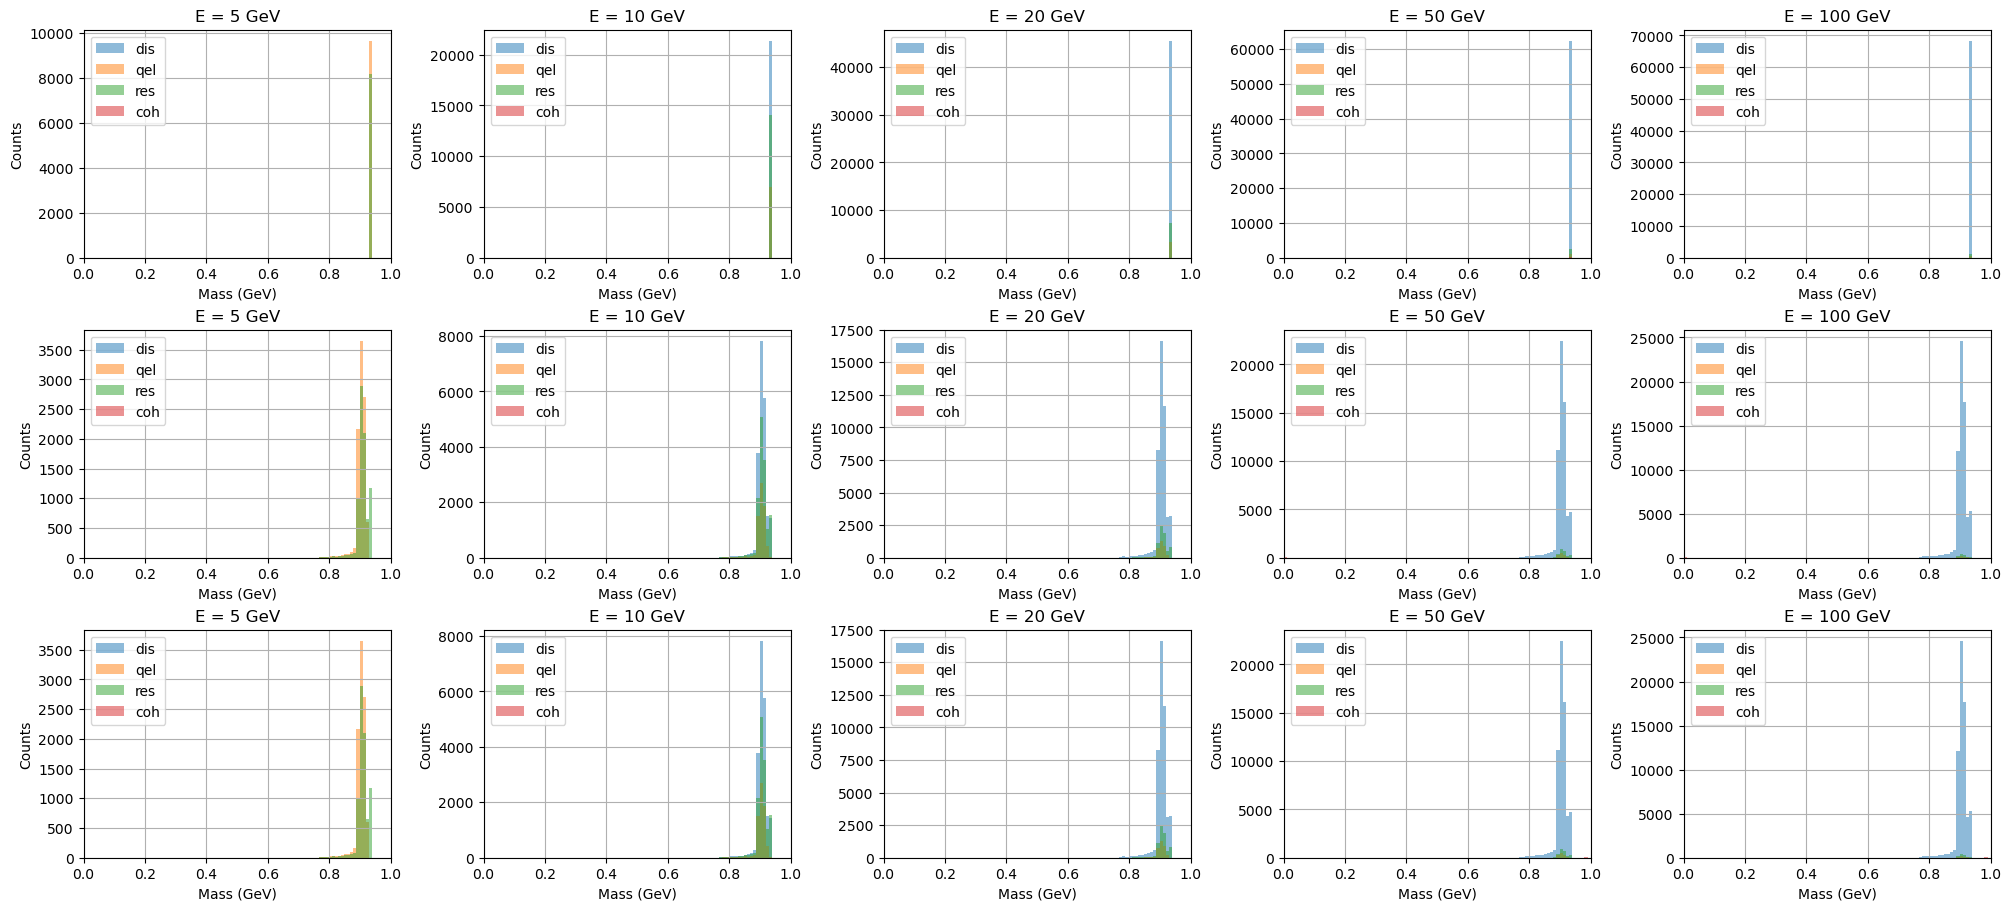

In [81]:
fig, axs = plt.subplots(nrows=3, ncols=len(event_infos), figsize=(4*len(event_infos), 9), layout="constrained")

# Calculate the mass of the nucleon using W and Q2
for e, ax_col in zip(event_infos.keys(), axs.T):
    ev = event_infos[e]
    p = particle_infos[e]
    
    taus = p[p["pdg"] == 15]
    tau4m = vector.array({"E": taus["E"], "px": taus["px"], "py": taus["py"], "pz": taus["pz"]})
    nutau4m = vector.array({"E": np.ones(len(taus)) * e, "px": np.zeros(len(taus)), "py": np.zeros(len(taus)), "pz": np.ones(len(taus)) * e})

    q = nutau4m - tau4m

    nucleon4m = vector.array({"E": ev["En"], "px": ev["pxn"], "py": ev["pyn"], "pz": ev["pzn"]})
    nutau4m_rotated, nucleon4m_rotated, tau4m_rotated = boost_rotated_4m(nutau4m, nucleon4m, tau4m)
    assert np.allclose(nucleon4m_rotated.M[nucleon4m.M != 0], nucleon4m.M[nucleon4m.M != 0]), np.c_[nucleon4m_rotated.M, nucleon4m.M][~np.isclose(nucleon4m_rotated.M, nucleon4m.M), :]

    # Calculate mass using W and Ws
    # Ms = -q.E + np.sqrt(ev["Ws"]**2 + q.px**2 + q.py**2 + q.pz**2)
    M = -q.E + np.sqrt(ev["W"]**2 + q.px**2 + q.py**2 + q.pz**2)
    Mboosted = nucleon4m_rotated.M

    bins = np.linspace(0, 1, 100)

    # Plot histograms
    for int_type in ["dis", "qel", "res", "coh"]:
        ax_col[0].hist(M[ev[int_type]], bins=bins, alpha=0.5, label=int_type)
        # ax_col[1].hist(Ms[ev[int_type]], bins=bins, alpha=0.5, label=int_type)
        ax_col[1].hist(nucleon4m.M[ev[int_type]], bins=bins, alpha=0.5, label=int_type)
        ax_col[2].hist(Mboosted[ev[int_type]], bins=bins, alpha=0.5, label=int_type)
    # ax.hist(M, bins=bins, alpha=0.5, label="W")
    # ax.hist(Ms, bins=bins, alpha=0.5, label="Ws")

    for ax in ax_col:
        ax.set(title=f"E = {e} GeV", xlabel="Mass (GeV)", ylabel="Counts", xlim=(bins[0], bins[-1]))
        ax.grid(True)
        ax.legend()


We can see that there is a distribution in the mass of the particles, for Ws, which I assume comes from the fact that there are some nuclear corrections.

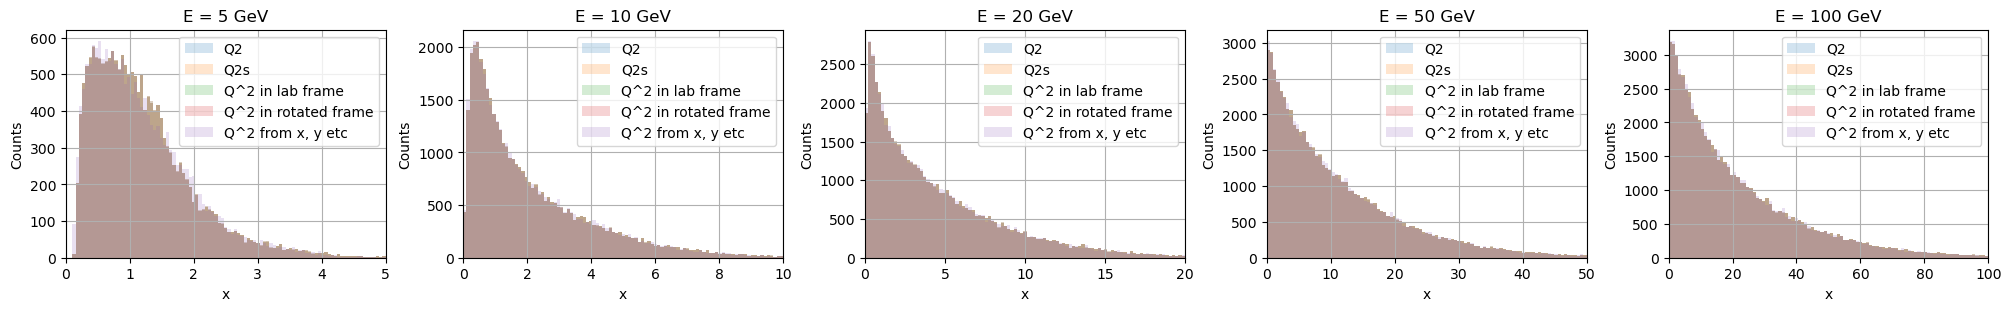

In [6]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Calculate the mass of the nucleon using W and Q2
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    p = particle_infos[e]
    
    taus = p[p["pdg"] == 15]
    tau4m = vector.array({"E": taus["E"], "px": taus["px"], "py": taus["py"], "pz": taus["pz"]})
    nutau4m = vector.array({"E": np.ones(len(taus)) * e, "px": np.zeros(len(taus)), "py": np.zeros(len(taus)), "pz": np.ones(len(taus)) * e})
    nucleon4m = vector.array({"E": ev["En"], "px": ev["pxn"], "py": ev["pyn"], "pz": ev["pzn"]})

    nutau4m_rotated, nucleon4m_rotated, tau4m_rotated = boost_rotated_4m(nutau4m, nucleon4m, tau4m)
    q_rotated = nutau4m_rotated - tau4m_rotated

    q = nutau4m - tau4m

    assert ev["Q2s"].isnull().sum() == 0
    assert np.allclose(-q[nucleon4m.E != 0]**2, -q_rotated[nucleon4m.E != 0]**2)

    bins = np.linspace(0, e, 100)

    # Plot histograms
    ax.hist(ev["Q2"], bins=bins, alpha=0.2, label="Q2")
    ax.hist(ev["Q2s"], bins=bins, alpha=0.2, label="Q2s")
    ax.hist(-q**2, bins=bins, alpha=0.2, label="Q^2 in lab frame")
    ax.hist(-q_rotated**2, bins=bins, alpha=0.2, label="Q^2 in rotated frame")
    ax.hist(2 * nucleon4m.M * nutau4m.E * ev["xs"] * ev["ys"], bins=bins, alpha=0.2, label="Q^2 from x, y etc")
    ax.set(title=f"E = {e} GeV", xlabel="x", ylabel="Counts", xlim=(bins[0], bins[-1]))
    ax.grid(True)
    ax.legend()


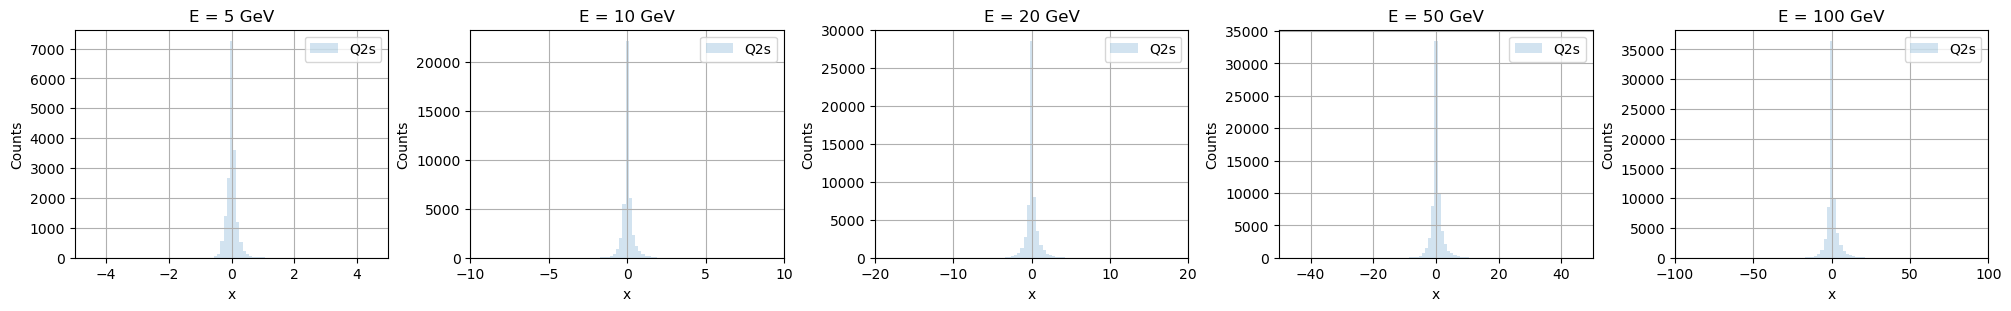

In [7]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Calculate the mass of the nucleon using W and Q2
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    p = particle_infos[e]
    
    taus = p[p["pdg"] == 15]
    tau4m = vector.array({"E": taus["E"], "px": taus["px"], "py": taus["py"], "pz": taus["pz"]})
    nutau4m = vector.array({"E": np.ones(len(taus)) * e, "px": np.zeros(len(taus)), "py": np.zeros(len(taus)), "pz": np.ones(len(taus)) * e})
    nucleon4m = vector.array({"E": ev["En"], "px": ev["pxn"], "py": ev["pyn"], "pz": ev["pzn"]})

    bins = np.linspace(0, e, 100)
    bins = np.linspace(0, e, 100)

    # Plot histograms
    ax.hist(ev["Q2s"] - (2 * nucleon4m.M * nutau4m.E * ev["xs"] * ev["ys"]), bins=bins, alpha=0.2, label="Q2s")
    ax.set(title=f"E = {e} GeV", xlabel="x", ylabel="Counts", xlim=(bins[0], bins[-1]))
    ax.grid(True)
    ax.legend()


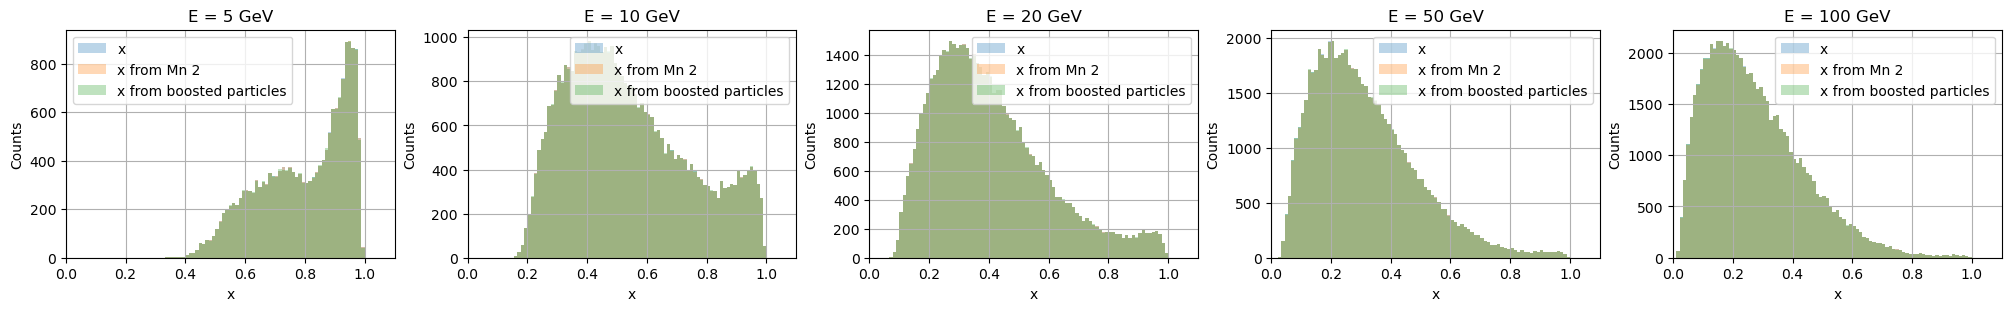

In [ ]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Calculate the mass of the nucleon using W and Q2
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    p = particle_infos[e]
    
    taus = p[p["pdg"] == 15]
    tau4m = vector.array({"E": taus["E"], "px": taus["px"], "py": taus["py"], "pz": taus["pz"]})
    nutau4m = vector.array({"E": np.ones(len(taus)) * e, "px": np.zeros(len(taus)), "py": np.zeros(len(taus)), "pz": np.ones(len(taus)) * e})
    nucleon4m = vector.array({"E": ev["En"], "px": ev["pxn"], "py": ev["pyn"], "pz": ev["pzn"]})

    nutau4m_rotated, nucleon4m_rotated, tau4m_rotated = boost_rotated_4m(nutau4m, nucleon4m, tau4m)
    q_rotated = nutau4m_rotated - tau4m_rotated

    q = nutau4m - tau4m
    # Calculate mass using W and Ws
    M = -q.E + np.sqrt(ev["W"]**2 + q.px**2 + q.py**2 + q.pz**2)

    x_from_m = ev["Q2s"] / (ev["Ws"]**2 + ev["Q2s"] - M**2)
    # x_from_mn = ev["Q2"] / (ev["W"]**2 + ev["Q2"] - (ev["En"]**2 - ev["pxn"]**2 - ev["pyn"]**2 - ev["pzn"]**2))
    x_from_mn2 = ev["Q2"] / (2*(ev["En"]*q.E - ev["pxn"]*q.px - ev["pyn"]*q.py - ev["pzn"]*q.pz))
    
    x_rotated = -q_rotated**2 / (2*nucleon4m_rotated.dot(q_rotated))
    
    assert ev["xs"].isnull().sum() == 0
    assert ((0 <= ev["xs"]) & (ev["xs"] <= 1)).all()
    
    bins = np.linspace(0, 1.1, 100)

    # Plot histograms
    ax.hist(ev["xs"], bins=bins, alpha=0.3, label="x")
    # ax.hist(x_from_m, bins=bins, alpha=0.3, label="x from Q2s and Ws")
    # ax.hist(x_from_ms, bins=bins, alpha=0.3, label="x from Ms")
    # ax.hist(x_from_m, bins=bins, alpha=0.3, label="x from M")
    # ax.hist(x_from_mn, bins=bins, alpha=0.3, label="x from Mn")
    ax.hist(x_from_mn2, bins=bins, alpha=0.3, label="x from Mn 2")
    ax.hist(x_rotated, bins=bins, alpha=0.3, label="x from boosted particles")
    ax.set(title=f"E = {e} GeV", xlabel="x", ylabel="Counts", xlim=(bins[0], bins[-1]))
    ax.grid(True)
    ax.legend()


/tmp/ipykernel_2639/2727681831.py:20: RuntimeWarning: invalid value encountered in sqrt
  W = np.sqrt((nucleon4m + q)**2)


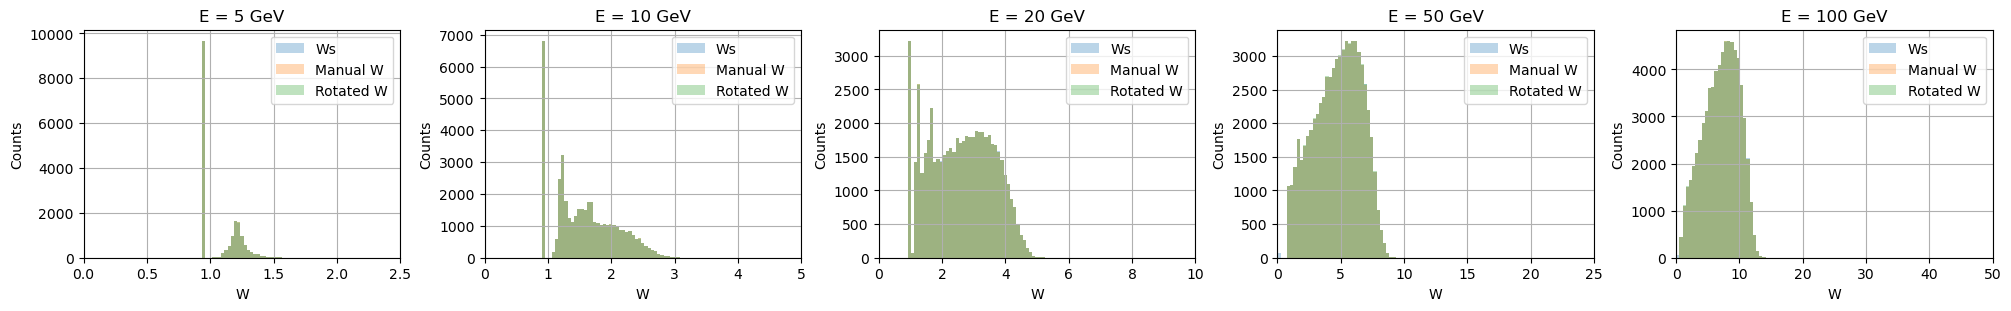

In [93]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Calculate the mass of the nucleon using W and Q2
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    p = particle_infos[e]
    
    taus = p[p["pdg"] == 15]
    tau4m = vector.array({"E": taus["E"], "px": taus["px"], "py": taus["py"], "pz": taus["pz"]})
    nutau4m = vector.array({"E": np.ones(len(taus)) * e, "px": np.zeros(len(taus)), "py": np.zeros(len(taus)), "pz": np.ones(len(taus)) * e})
    nucleon4m = vector.array({"E": ev["En"], "px": ev["pxn"], "py": ev["pyn"], "pz": ev["pzn"]})

    nutau4m_rotated, nucleon4m_rotated, tau4m_rotated = boost_rotated_4m(nutau4m, nucleon4m, tau4m)
    # Calculate W in the rotated frame
    q_rotated = nutau4m_rotated - tau4m_rotated
    W_rotated = np.sqrt((nucleon4m_rotated + q_rotated)**2)

    # Calculate W using lab frame p and q
    q = nutau4m - tau4m
    W = np.sqrt((nucleon4m + q)**2)

    assert ev["Ws"].isnull().sum() == 0
    assert np.all(ev["Ws"] > 0)
    
    assert np.allclose(W_rotated[nucleon4m.E != 0], W[nucleon4m.E != 0])

    # not_close_values = ~np.isclose(W, ev["Ws"], atol=2e-3)
    # assert not_close_values.sum() < 5, (W[not_close_values], ev["Ws"][not_close_values])
    
    bins = np.linspace(0, e/2, 100)

    # Plot histograms
    ax.hist(ev["Ws"], bins=bins, alpha=0.3, label="Ws")
    ax.hist(W, bins=bins, alpha=0.3, label="Manual W")
    ax.hist(W_rotated, bins=bins, alpha=0.3, label="Rotated W")
    ax.set(title=f"E = {e} GeV", xlabel="W", ylabel="Counts", xlim=(bins[0], bins[-1]))
    ax.grid(True)
    ax.legend()


We see from all plots above that the distribution of W, Q^2, M and x all match between the lab frame and the boosted/rotated frame, which is good! They also match the values in the gst file relatively well (there is a larger discrepancy here on the level of 2e-3, but the distributions are still fine, so things look reasonable!)

## Tau energy

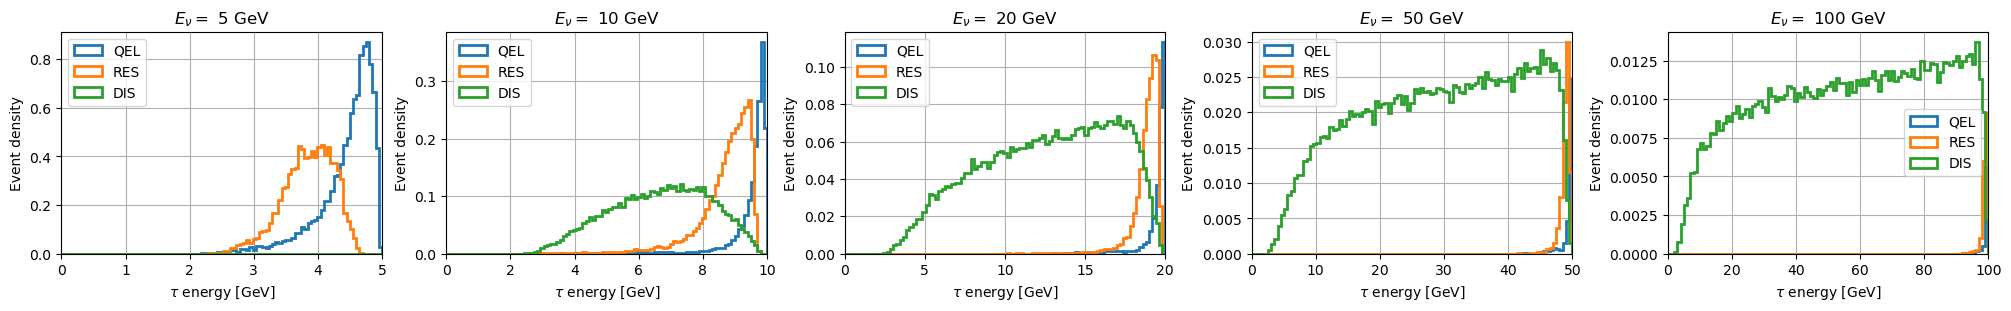

In [28]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Calculate the mass of the nucleon using W and Q2
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    p = particle_infos[e]
    
    taus = p[p["pdg"] == 15]
    
    bins = np.linspace(0, e, 100)

    # Plot histograms
    for int_type in ["qel", "res", "dis"]: # , "coh"
        values = taus.loc[ev[int_type].values, "E"]
        ax.hist(values, bins=bins, label=int_type.upper(), histtype="step", lw=2, weights=np.ones(values.shape)/taus.shape[0] / np.diff(bins)[0])

    ax.set(title=r"$E_\nu =$" + f" {e} GeV", xlabel=r"$\tau$ energy [GeV]", ylabel="Event density", xlim=(bins[0], bins[-1]))
    ax.grid(True)
    ax.legend()


In [26]:
len(taus.loc[ev[int_type].values])

9682

In [22]:
ev[int_type]

0         True
1         True
2         True
3        False
4        False
         ...  
17876    False
17877     True
17878     True
17879     True
17880     True
Name: qel, Length: 17881, dtype: bool

In [16]:
{label: e.shape[0] for label, e in event_infos.items()}

{5: 17881, 10: 42493, 20: 56282, 50: 66363, 100: 70092}

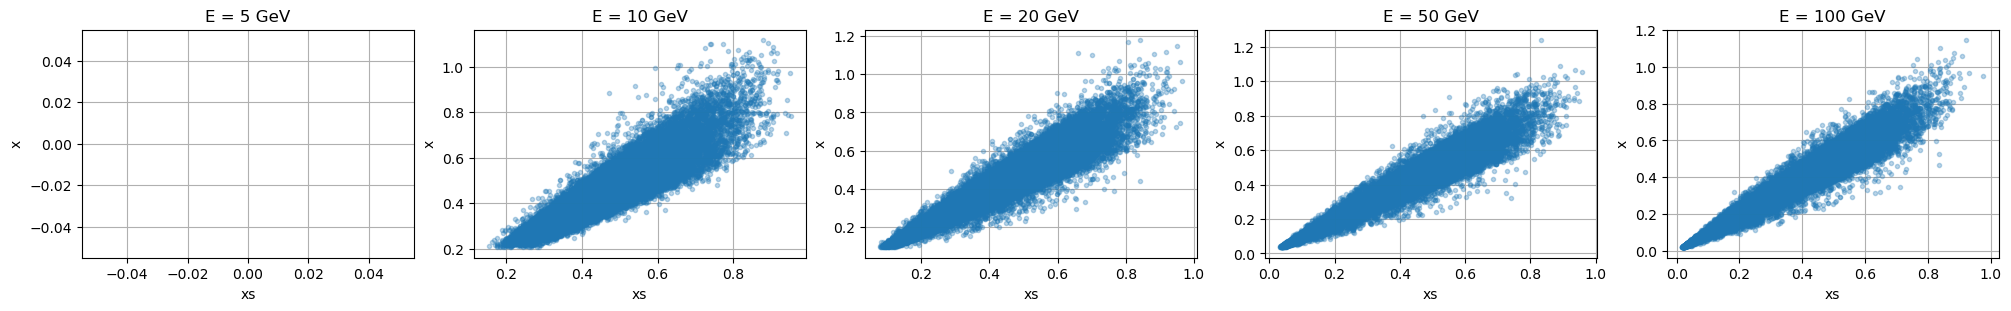

In [17]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Plot x as a function of xs
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    
    ax.plot(ev["xs"][ev["dis"]], ev["x"][ev["dis"]], ".", alpha=0.3)
    ax.set(title=f"E = {e} GeV", xlabel="xs", ylabel="x")
    ax.grid(True)

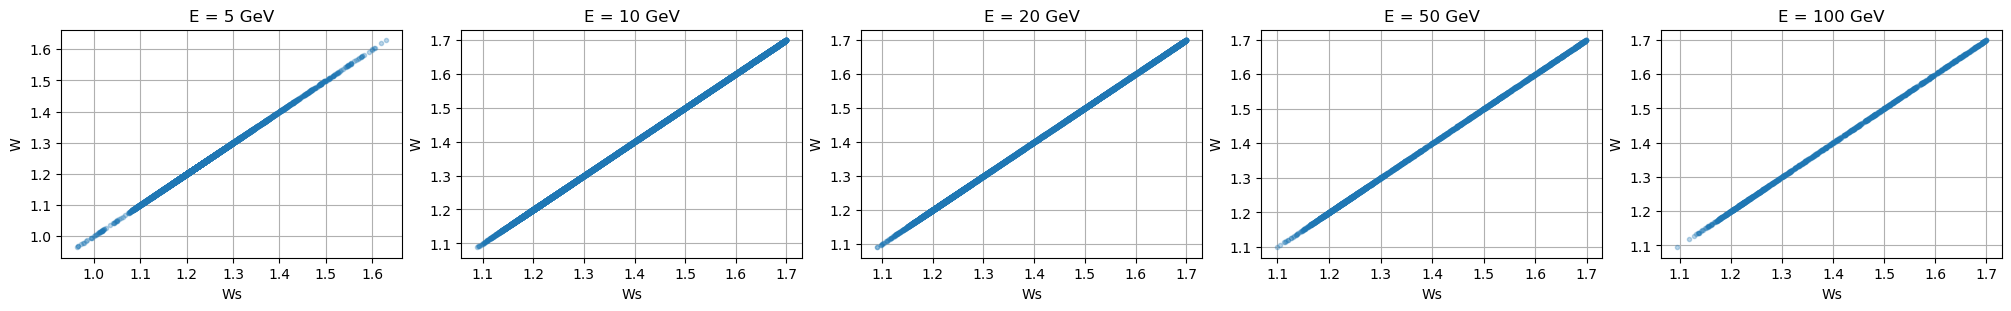

In [19]:
fig, axs = plt.subplots(ncols=len(event_infos), figsize=(4*len(event_infos), 3), layout="constrained")

# Plot x as a function of xs
for e, ax in zip(event_infos.keys(), axs):
    ev = event_infos[e]
    
    ax.plot(ev["Ws"][ev["res"]], ev["Ws"][ev["res"]], ".", alpha=0.3)
    ax.set(title=f"E = {e} GeV", xlabel="Ws", ylabel="W")
    ax.grid(True)

They do not overlap so well. The x calculated from Ms is better than the x calculated from M, though of course the x from Ms is not perfect. It might therefore be best to pass x as a parameter to the tau polarization vector calculator as well, for additional correctness. This is useful regardless, since the calculated x has values > 1, which is unphysical.

## Add parameters to event file
To make a file that can be taken as input to the DIS structure function calculator

In [9]:
import vector

def boost_rotated_4m(nutau4m, nucleon4m, tau4m, test=False, rotate_tau=True):
    """Change reference frame to one where the nucleon is at rest, the neutrino has a pure momentum in the +z direction, and the tau only has a momentum in the x and z directions.
    
    These are the three assumptions that exist for the formula to work. 
    The third assumption is most likely taken care for in the formulas automatically, since all formulas either use p*q, q**2 or some other parameter where the """
    # Replace the nucleon 4-momentum vectors that are incorrect
    # zero_nucleons = nucleon4m.E == 0
    # assert not np.any(nucleon4m.E == 0)
    # nucleon_arr = np.array([nucleon4m.E, nucleon4m.px, nucleon4m.py, nucleon4m.pz])
    # nucleon_arr[0, zero_nucleons] = 0.98318
    # nucleon4m = vector.array({"E": nucleon_arr[0, :], "px": nucleon_arr[1, :], "py": nucleon_arr[2, :], "pz": nucleon_arr[3, :]})

    # Boost all vectors such that the nucleon is at rest
    tau4m_boosted = tau4m.boostCM_of(nucleon4m)
    nucleon4m_boosted = nucleon4m.boostCM_of(nucleon4m)
    nutau4m_boosted = nutau4m.boostCM_of(nucleon4m)

    # get the angles to rotate nutau4m_boosted so that it is aligned with the z axis, pointing towards positive z
    phi = nutau4m_boosted.phi
    theta = nutau4m_boosted.theta

    # Rotate nutau4m_boosted so that it is aligned with the z axis, pointing towards positive z
    nutau4m_rotated = nutau4m_boosted.rotateZ(-phi).rotateY(-theta)
    # Rotate all other momentum vectors, thereby preserving the 4-momentum conservation
    tau4m_rotated = tau4m_boosted.rotateZ(-phi).rotateY(-theta)
    nucleon4m_rotated = nucleon4m_boosted.rotateZ(-phi).rotateY(-theta)
    
    if not rotate_tau:
        return nutau4m_rotated, nucleon4m_rotated, tau4m_rotated
    
    tau_phi = tau4m_rotated.phi
    # Rotate nutau4m_boosted so that it is aligned with the z axis, pointing towards positive z
    nutau4m_rotated2 = nutau4m_rotated.rotateZ(-tau_phi)
    # Rotate all other momentum vectors, thereby preserving the 4-momentum conservation
    tau4m_rotated2 = tau4m_rotated.rotateZ(-tau_phi)
    nucleon4m_rotated2 = nucleon4m_rotated.rotateZ(-tau_phi)

    if test:
        assert np.allclose(nucleon4m_boosted.px, 0), nucleon4m_boosted.px[~np.isclose(nucleon4m_boosted.px, 0)]
        assert np.allclose(nucleon4m_boosted.py, 0), nucleon4m_boosted.py[~np.isclose(nucleon4m_boosted.py, 0)]
        assert np.allclose(nucleon4m_boosted.pz, 0), nucleon4m_boosted.py[~np.isclose(nucleon4m_boosted.py, 0)]

        assert np.allclose(nutau4m_rotated.px, 0), nutau4m_rotated.px[~np.isclose(nutau4m_rotated.px, 0)]
        assert np.allclose(nutau4m_rotated.py, 0), nutau4m_rotated.py[~np.isclose(nutau4m_rotated.py, 0)]
        assert np.allclose(nutau4m_rotated.E, nutau4m_rotated.pz), nutau4m_rotated[~np.isclose(nutau4m_rotated.pz, nutau4m_rotated.E)]

        assert np.allclose(nucleon4m_rotated.px, 0)
        assert np.allclose(nucleon4m_rotated.py, 0)
        assert np.allclose(nucleon4m_rotated.pz, 0)

        assert np.allclose(tau4m_rotated2.py, 0), (tau4m_rotated2.py, tau4m_rotated.py)
        assert np.all(nutau4m_rotated2.isclose(nutau4m_rotated))
        assert np.all(nucleon4m_rotated2.isclose(nucleon4m_rotated))
        
        # Q^2
        assert np.allclose(-(nutau4m_rotated - tau4m_rotated)**2, -(nutau4m - tau4m)**2)
    
    return nutau4m_rotated2, nucleon4m_rotated2, tau4m_rotated2

In [10]:
for e in (5, 10, 20, 50, 100):
    event_info = pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_event_info.csv")
    particle_info = pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_particles.csv")
    nutau = particle_info.groupby("event_num").nth(1)
    nutau4m = vector.array({"E": nutau["E"], "px": nutau["px"], "py": nutau["py"], "pz": nutau["pz"]})
    nucleon4m = vector.array({"E": event_info["En"], "px": event_info["pxn"], "py": event_info["pyn"], "pz": event_info["pzn"]})
    # Dummy variable that is not used
    tau4m = nutau4m
    
    nutau4m_rotated, nucleon4m_rotated, tau4m_rotated = boost_rotated_4m(nutau4m, nucleon4m, tau4m)
    assert set(particle_info.groupby("event_num").first()["pdg"].unique().tolist()) == {2212, 1000080160}

    event_info["atom"] = 16
    event_info.loc[(particle_info.groupby("event_num").first()["pdg"] == 2212).values, "atom"] = 1
    
    event_info["Mnuc"] = np.sqrt(event_info["En"]**2 - event_info["pxn"]**2 - event_info["pyn"]**2 - event_info["pzn"]**2)
    event_info["Enu"] = nutau4m_rotated["E"]
    event_info["pxnu"] = nutau4m_rotated["px"]
    event_info["pynu"] = nutau4m_rotated["py"]
    event_info["pznu"] = nutau4m_rotated["pz"]

    event_info["En"] = nucleon4m_rotated["E"]
    event_info["pxn"] = nucleon4m_rotated["px"]
    event_info["pyn"] = nucleon4m_rotated["py"]
    event_info["pzn"] = nucleon4m_rotated["pz"]

    # event_info["Mnuc"] = 0.93891
    event_info.to_csv(f"../data/test_genie_NuTau_{e}.0_GeV_event_info_dis.csv", index=False)

In [11]:
df = pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_event_info_dis.csv")

In [14]:
df.isnull().sum()

event_num     0
cc            0
dis           0
qel           0
res           0
nuel          0
coh           0
dfr           0
imd           0
xsec          0
diffxsec      0
hitnuc        0
hitqrk        0
sea           0
resid         0
x             0
xs            0
y             0
ys            0
W            12
Ws            0
Q2            0
Q2s           0
charm         0
En           55
pxn          55
pyn          55
pzn          55
atom          0
Mnuc          0
Enu          55
pxnu         55
pynu         55
pznu         55
dtype: int64

## Add dummy nucleus and incoming neutrino to tau only file
This is because all my code is written assuming that the first three rows are the nucleus, the incoming neutrino, and the outgoing tau.

In [5]:
# Add two dummy rows in each event with the tau neutrino and nucleus to tau_only_nopol_df, tau_only_lpol_df, tau_only_pythia_nopol_df, tau_only_pythia_lpol_df
raw_df = pd.read_csv("../data/tau_decays_159007_particles.csv")
extended_event_dfs = []
for event_num, df in raw_df.groupby("event_num"):
    initial_state_particles = pd.DataFrame({"event_num": [event_num, event_num], "pdg": [16, 1000080160], "E": [0, 0], "px": [0, 0], "py": [0, 0], "pz": [0, 0]})
    # print(df)
    extended_event_dfs.append(initial_state_particles)
    extended_event_dfs.append(df)

extended_event_df = pd.concat(extended_event_dfs).reset_index(drop=True)
extended_event_df.to_csv("../data/tau_decays_159007_particles_extended.csv", index=False)

In [4]:
# Add two dummy rows in each event with the tau neutrino and nucleus to tau_only_nopol_df, tau_only_lpol_df, tau_only_pythia_nopol_df, tau_only_pythia_lpol_df
for e in (0, 5, 10, 20, 50, 100, 1000):
    raw_df = pd.read_csv(f"../data/test_bare_lepton_toy_Tau_000005_{e}.0_GeV_particles_v00.05.csv",
        # Ignore the last 3 columns
        usecols=lambda x: x not in ["polx", "poly", "polz"]
    )

    # Define the new rows
    new_rows = pd.DataFrame({'event_num': [pd.NA, pd.NA],
                            'pdg': [16, 1000080160],
                            'E': [1, 1],
                            'px': [0, 0],
                            'py': [0, 0],
                            'pz': [1, 0]})

    sub_dfs = [(new_rows, group) for _, group in raw_df.groupby('event_num')]
    df_with_new_rows = pd.concat([value for sublist in sub_dfs for value in sublist])
    df_with_new_rows.reset_index(drop=True, inplace=True)
    df_with_new_rows["event_num"] = df_with_new_rows["event_num"].bfill().astype(int)
    # Fill na in the event_num column by taking the value below
    df_with_new_rows.to_csv(f"../data/test_bare_lepton_toy_Tau_000005_{e}.0_GeV_particles_extended.csv", index=False)
    print(f"Finished {e}")

Finished 1000


## Analyze polarization of events

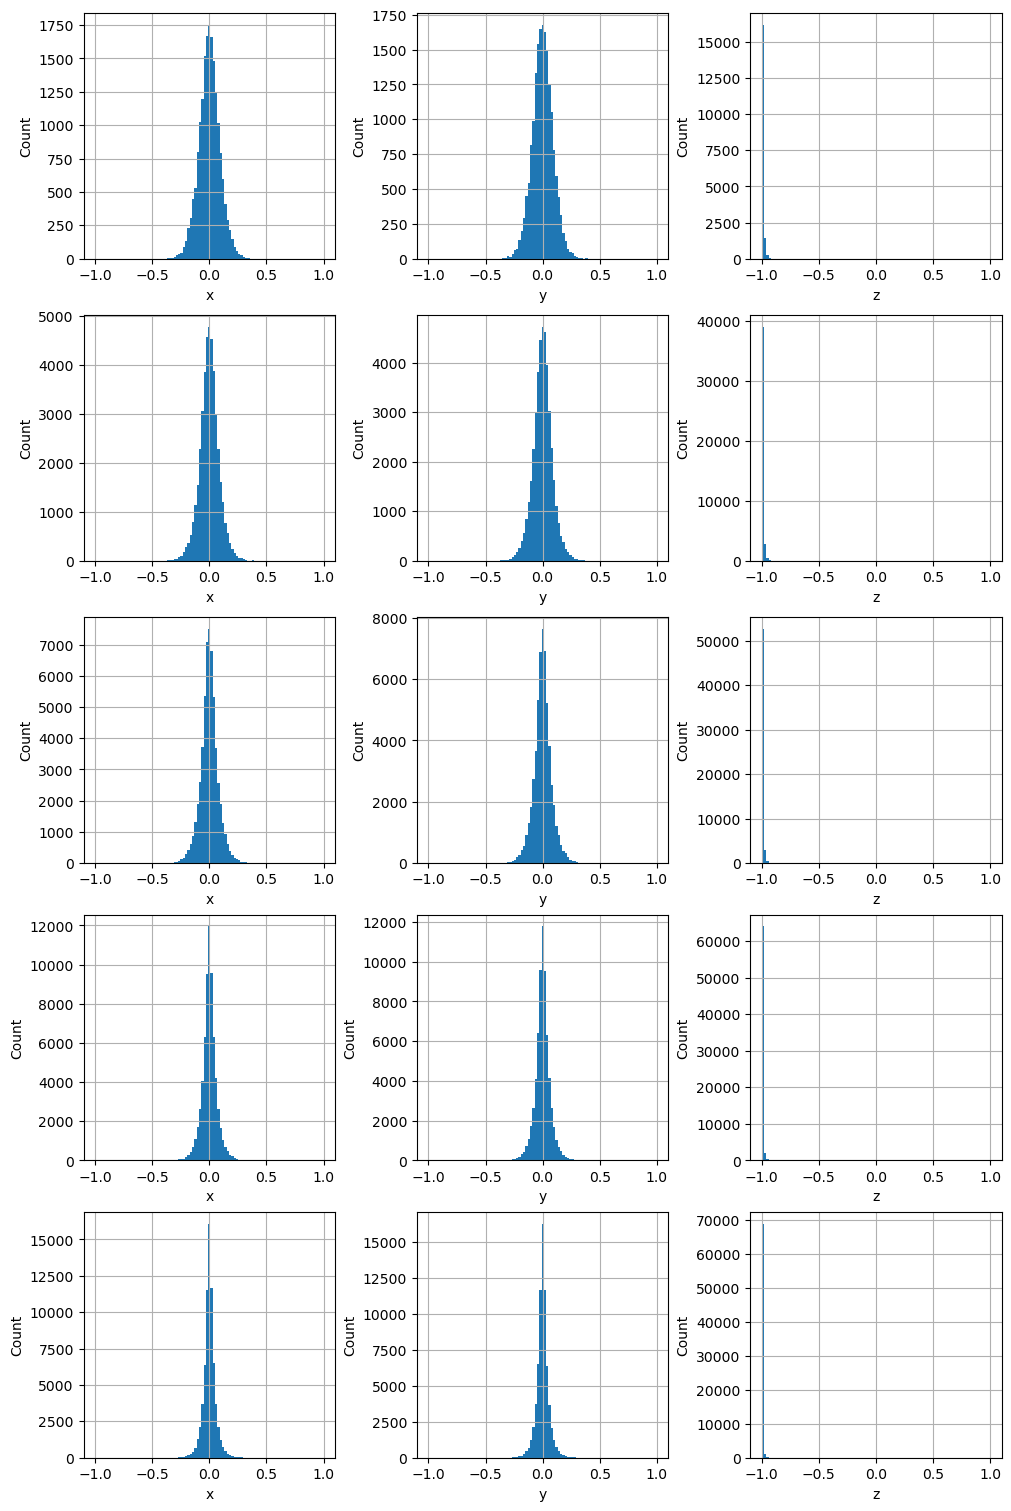

In [14]:
## Polarization
# Investigate how may of the tau leptons are polarized and how much
fig, axs = plt.subplots(ncols=3, nrows=len(particle_infos), figsize=(10,3*len(particle_infos)), layout="constrained")

for (e, p), ax_row in zip(particle_infos.items(), axs):
    taus = p.query("pdg == 15")
    for ax, axis in zip(ax_row, ["x", "y", "z"]):
        ax.hist(taus[f"pol{axis}"], bins=np.linspace(-1, 1, 100))
        ax.set(xlabel=axis, ylabel="Count")
        ax.grid(True)

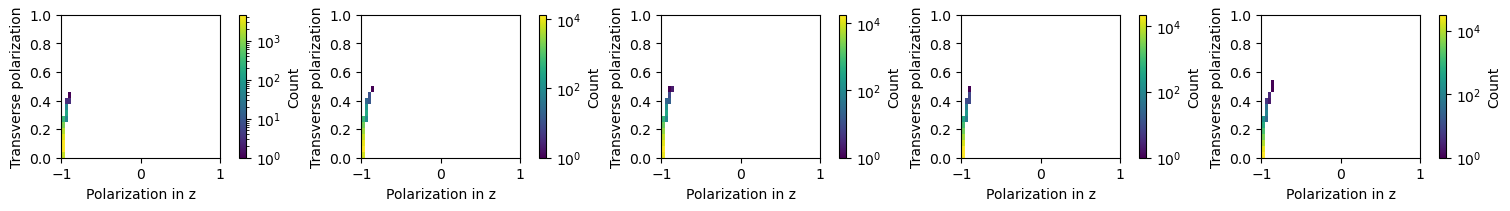

In [18]:
fig, axs = plt.subplots(ncols=len(particle_infos), figsize=(3*len(particle_infos), 2), layout="constrained")

for (e, p), ax in zip(particle_infos.items(), axs):
    taus = p.query("pdg == 15")
    # Plot a 2D histogram of the polarization, with pz as one component and the transverse polarization as the other
    *_, im = ax.hist2d(taus["polz"], np.sqrt(taus["polx"]**2 + taus["poly"]**2), bins=(np.linspace(-1, 1, 50), np.linspace(0, 1, 25)), norm=matplotlib.colors.LogNorm())
    fig.colorbar(im, ax=ax, label="Count")
    ax.set(xlabel="Polarization in z", ylabel="Transverse polarization")

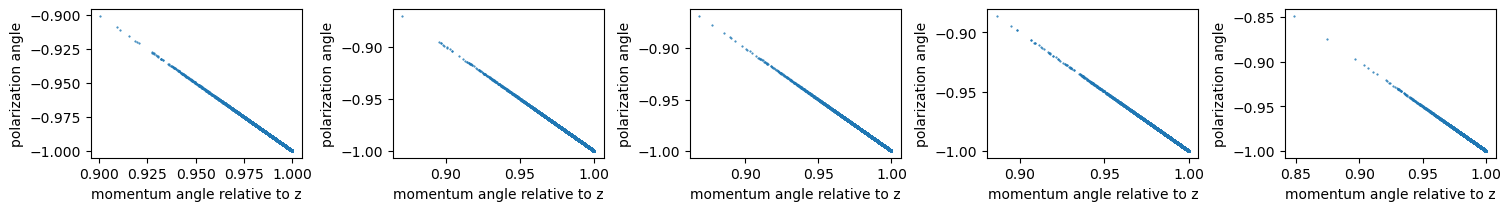

In [21]:
fig, axs = plt.subplots(ncols=len(particle_infos), figsize=(3*len(particle_infos), 2), layout="constrained")

for (e, p), ax in zip(particle_infos.items(), axs):
    # Plot a 2D histogram of the polarization, with pz as one component and the transverse polarization as the other
    taus = p.query("pdg == 15")
    tau_p = (taus[["px", "py", "pz"]] ** 2).sum(axis=1) ** 0.5
    polz = taus["polz"]
    ax.plot(taus["pz"] / tau_p, polz, ".", markersize=1)
    ax.set(xlabel="momentum angle relative to z", ylabel="polarization angle")

In [45]:
genie_pols = pd.read_csv("../data/genie_pol_e5.csv")
# Plot a 2D histogram of the polarization, with pz as one component and the transverse polarization as the other
taus = genie_pols.query("(pdg == 15) and (polz != 0)")
tau_p = (taus[["px", "py", "pz"]] ** 2).sum(axis=1) ** 0.5
tau_pol_diff_z = taus["polz"] + taus["pz"] / tau_p
print(taus["polz"])
print(taus["pz"] / tau_p)
# assert  np.isclose(tau_pol_diff_z, 0).all(), tau_pol_diff_z


0        -0.999735
2        -0.999178
4        -0.984216
5        -0.993166
9        -0.991862
            ...   
154387   -0.998121
154388   -0.990459
154389   -0.993901
154392   -0.983396
154395   -0.980883
Name: polz, Length: 54193, dtype: float64
0         0.999735
2         0.999178
4         0.984216
5         0.993166
9         0.991862
            ...   
154387    0.998121
154388    0.990459
154389    0.993901
154392    0.983396
154395    0.980883
Length: 54193, dtype: float64


In [43]:
genie_pols

,event_num,pdg,E,px,py,pz,polx,poly,polz
0,4,15,3.67461,-0.000156,-0.074012,3.21559,0.000048,0.023011,-0.999735
1,5,15,4.13579,0.493657,-0.240467,3.69405,0.000000,0.000000,0.000000
2,15,15,3.31492,-0.107529,-0.036129,2.79617,0.038424,0.012910,-0.999178
3,20,15,4.69982,-0.441461,0.209511,4.32346,0.000000,0.000000,0.000000
4,22,15,3.52693,0.523667,0.128337,2.99855,-0.171884,-0.042124,-0.984216
...,...,...,...,...,...,...,...,...,...
154393,995189,15,3.79233,-0.418670,-0.278067,3.31239,0.000000,0.000000,0.000000
154394,995201,15,4.37156,-0.744747,-0.107314,3.92264,0.000000,0.000000,0.000000
154395,995214,15,3.59273,-0.117279,-0.596226,3.06287,0.037559,0.190941,-0.980883
154396,995223,15,4.52561,-0.583319,0.568008,4.08179,0.000000,0.000000,0.000000


[(-1.0, 2.0), (-1.0, 1.0)]

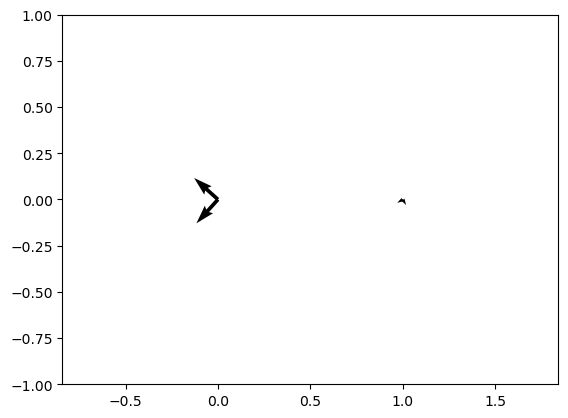

In [18]:
# Plot the x and y components of the polarization, compared to the x and y components of the momentum
# Plot one arrow each
fig, ax = plt.subplots()
taus = particle_infos[5].query("(pdg == 15) and (polz != 0)")
tau_p = (taus[["px", "py", "pz"]] ** 2).sum(axis=1) ** 0.5
tau_px_dir = taus["px"] / tau_p
tau_py_dir = taus["py"] / tau_p

ax.quiver(np.arange(2), np.zeros(2), taus["polx"].iloc[:2], taus["poly"].iloc[:2], angles="xy", scale_units="xy", scale=1)
ax.quiver(np.arange(2), np.zeros(2), tau_px_dir.iloc[:2], tau_py_dir.iloc[:2], angles="xy", scale_units="xy", scale=1)
ax.axis("equal")
ax.set(xlim=(-1, 2), ylim=(-1, 1))

In [48]:
pol_xy = vector.array(dict(x=taus["polx"].values, y=taus["poly"].values, z=np.zeros(len(taus))))
p_xy = vector.array(dict(x=taus["px"].values, y=taus["py"].values, z=np.zeros(len(taus)))).rotateZ(-np.pi/2)
assert np.isclose(pol_xy.deltaangle(p_xy), 0, atol=1e-7).all()

This shows that the x- and y-components of the vectors are just rotated 90 degrees against each other.

In [41]:
for e, p in particle_infos.items():
    # Plot a 2D histogram of the polarization, with pz as one component and the transverse polarization as the other
    taus = p.query("pdg == 15")
    tau_p = (taus[["px", "py", "pz"]] ** 2).sum(axis=1) ** 0.5
    tau_pol_diff_z = taus["polz"] + taus["pz"] / tau_p
    # tau_pol_diff_x = taus["polx"] + taus["px"] / tau_p
    # tau_pol_diff_y = taus["poly"] + taus["py"] / tau_p
    assert  np.isclose(tau_pol_diff_z, 0).all(), tau_pol_diff_z
    # assert np.isclose(tau_pol_diff_x, 0).all(), tau_pol_diff_x
    # assert np.isclose(tau_pol_diff_y, 0).all(), tau_pol_diff_y

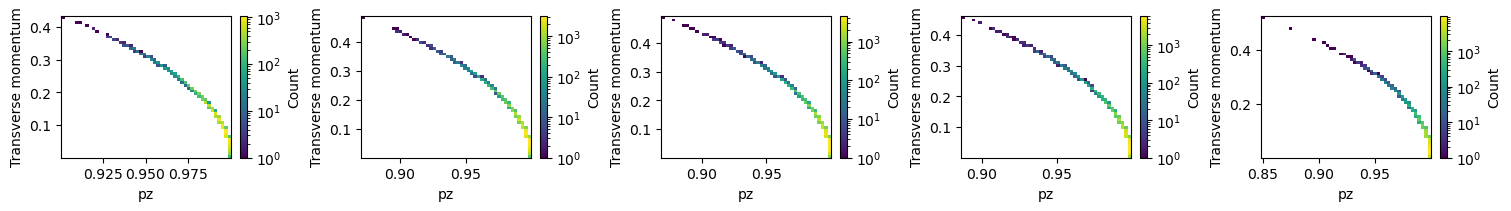

In [ ]:
fig, axs = plt.subplots(ncols=len(particle_infos), figsize=(3*len(particle_infos), 2), layout="constrained")

for (e, p), ax in zip(particle_infos.items(), axs):
    # Plot a 2D histogram of the polarization, with pz as one component and the transverse polarization as the other
    taus = p.query("pdg == 15")
    tau_p = (taus[["px", "py", "pz"]] ** 2).sum(axis=1) ** 0.5
    *_, im = ax.hist2d(taus["pz"].values / tau_p, np.sqrt(taus["px"]**2 + taus["py"]**2).values / tau_p, bins=50, norm=matplotlib.colors.LogNorm())
    fig.colorbar(im, ax=ax, label="Count")
    ax.set(xlabel="pz", ylabel="Transverse momentum")

In [ ]:
# Calculate the azimuth and polar angles of the polarization vector relative to the tau momentum vector
tau_momentum_direction = tau_all[["px", "py", "pz"]].values / np.linalg.norm(tau_all[["px", "py", "pz"]].values, axis=1)[:, np.newaxis]
angle_between = np.arccos(np.sum(tau_momentum_direction * tau_all[["polx", "poly", "polz"]].values, axis=1))
fig, axs = plt.subplots(ncols=len(particle_infos), figsize=(3*len(particle_infos), 2), layout="constrained")
for e, ax in zip(axs, particle_infos):
    ax.hist(angle_between, bins=np.linspace(0, 10, 100))
    ax.set(xlabel="Polar angle", ylabel="Count")

[Text(0.5, 0, 'Polar angle'), Text(0, 0.5, 'Count')]

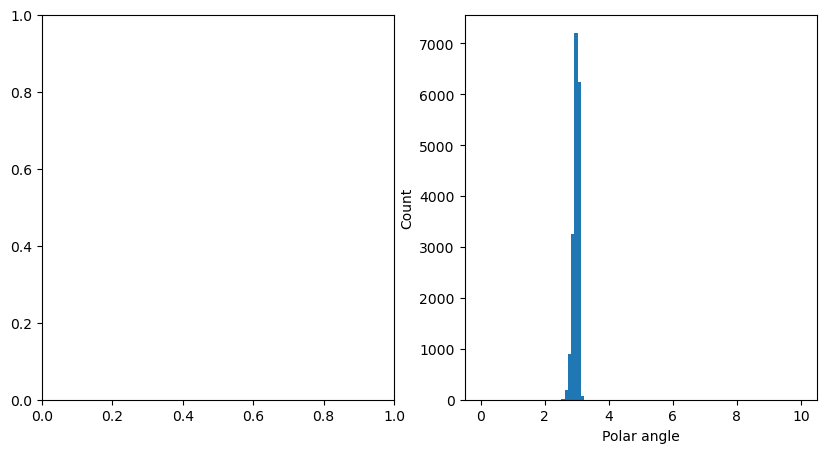

In [158]:
# Calculate the azimuth and polar angles of the polarization vector relative to the tau momentum vector
tau_momentum_direction = tau_all[["px", "py", "pz"]].values / np.linalg.norm(tau_all[["px", "py", "pz"]].values, axis=1)[:, np.newaxis]
angle_between = np.arccos(np.sum(tau_momentum_direction * tau_all[["polx", "poly", "polz"]].values, axis=1))
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
# axs[0].hist(azimuth, bins=np.linspace(-180, 180, 100))
# axs[0].set(xlabel="Azimuthal angle", ylabel="Count")
axs[1].hist(angle_between, bins=np.linspace(0, 10, 100))
axs[1].set(xlabel="Polar angle", ylabel="Count")

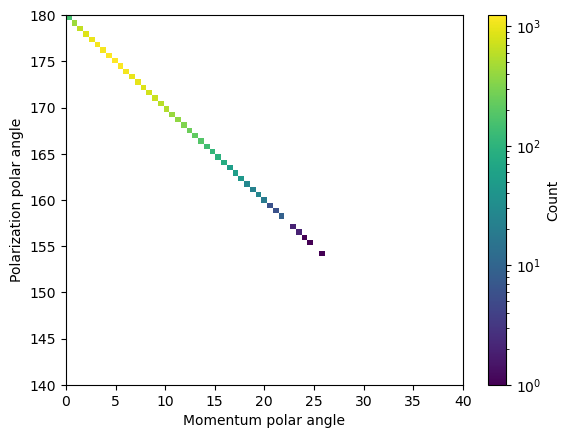

In [167]:
# Plot a 2D histogram with the tau polarization angle relative to the z axis, and the angle between the momentum vector and the z axis
fig, ax = plt.subplots()
*_, im = ax.hist2d(
    180/np.pi * np.arccos(tau_all["pz"] / np.linalg.norm(tau_all[["px", "py", "pz"]].values, axis=1)), 
    180/np.pi * np.arccos(tau_all["polz"]), 
    bins=(np.linspace(0, 40, 70), np.linspace(140, 180, 70)), norm=matplotlib.colors.LogNorm())
ax.set(xlabel="Momentum polar angle", ylabel="Polarization polar angle")
fig.colorbar(im, ax=ax, label="Count")

If the tau polarization angle were in the tau rest frame, there would (likely) have been a dependence between the tau momentum angle and the tau polarization angle. However, it would have been a more spread out dependence, since the tau polarization would not always have a specific angle.

For example, if the tau lepton were always fully polarized and the polarization vector is given in the tau rest frame, it would always have a value of 180 degrees, regardless of the tau momentum angle. If the polarization were given in the lab frame, it would be perfectly correlated with the tau momentum angle. 

In our case, the polarization angle almost perfectly correlates with the momentum angle, which is too good to be true for the tau rest frame case, meaning that the tau polarization vector is given in the lab frame.

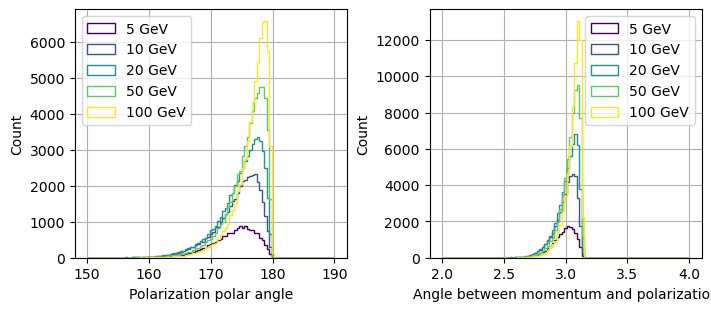

In [19]:
# Get len(particle_infos) different colors from viridis

colors = plt.cm.viridis(np.linspace(0, 1, len(particle_infos)))

fig, ax = plt.subplots(ncols=2, figsize=(7, 3), layout="constrained")
for (e, df), c in zip(particle_infos.items(), colors):
    tau_all = df.query("pdg == 15")
    # azimuth = 180/np.pi * np.arctan2(tau_all["polx"], tau_all["poly"])
    polar = 180/np.pi * np.arccos(tau_all["polz"])
    tau_momentum_direction = tau_all[["px", "py", "pz"]].values / np.linalg.norm(tau_all[["px", "py", "pz"]].values, axis=1)[:, np.newaxis]
    angle_between = np.arccos(np.sum(tau_momentum_direction * tau_all[["polx", "poly", "polz"]].values, axis=1))
    
    ax[0].hist(polar, bins=np.linspace(150, 190, 100), label=f"{e} GeV", histtype="step", color=c)
    ax[0].set(xlabel="Polarization polar angle", ylabel="Count")
    ax[1].hist(angle_between, bins=np.linspace(2, 4, 100), label=f"{e} GeV", histtype="step", color=c)
    ax[1].set(xlabel="Angle between momentum and polarization", ylabel="Count")
    
for a in ax:
    a.legend()
    a.grid()

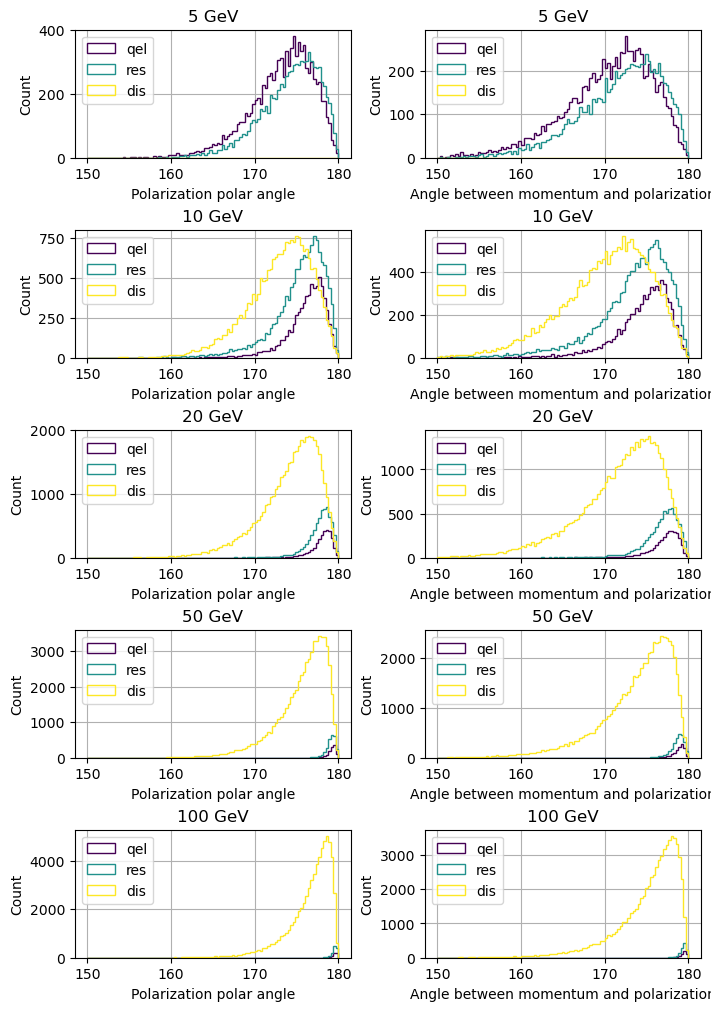

In [75]:
# Get len(particle_infos) different colors from viridis

colors = plt.cm.viridis(np.linspace(0, 1, 3))

fig, axs = plt.subplots(ncols=2, nrows=len(particle_infos), figsize=(7, 10), layout="constrained")
for (e, df), ev, ax in zip(particle_infos.items(), event_infos.values(), axs):
    for int_type, c in zip(("qel", "res", "dis"), colors):
        tau_all = df.query("pdg == 15")[ev[int_type].values]
        # azimuth = 180/np.pi * np.arctan2(tau_all["polx"], tau_all["poly"])
        polar = 180/np.pi * np.arccos(tau_all["polz"])
        tau_momentum_direction = tau_all[["px", "py", "pz"]].values / np.linalg.norm(tau_all[["px", "py", "pz"]].values, axis=1)[:, np.newaxis]
        angle_between = 180/np.pi * np.arccos(np.sum(tau_momentum_direction * tau_all[["polx", "poly", "polz"]].values, axis=1))
        
        ax[0].hist(polar, bins=np.linspace(150, 180, 100), label=int_type, histtype="step", color=c)
        ax[0].set(xlabel="Polarization polar angle", ylabel="Count", title=f"{e} GeV")
        ax[1].hist(angle_between, bins=np.linspace(150, 180, 100), label=int_type, histtype="step", color=c)
        ax[1].set(xlabel="Angle between momentum and polarization", ylabel="Count", title=f"{e} GeV")
        
for a in axs.flat:
    a.legend()
    a.grid()

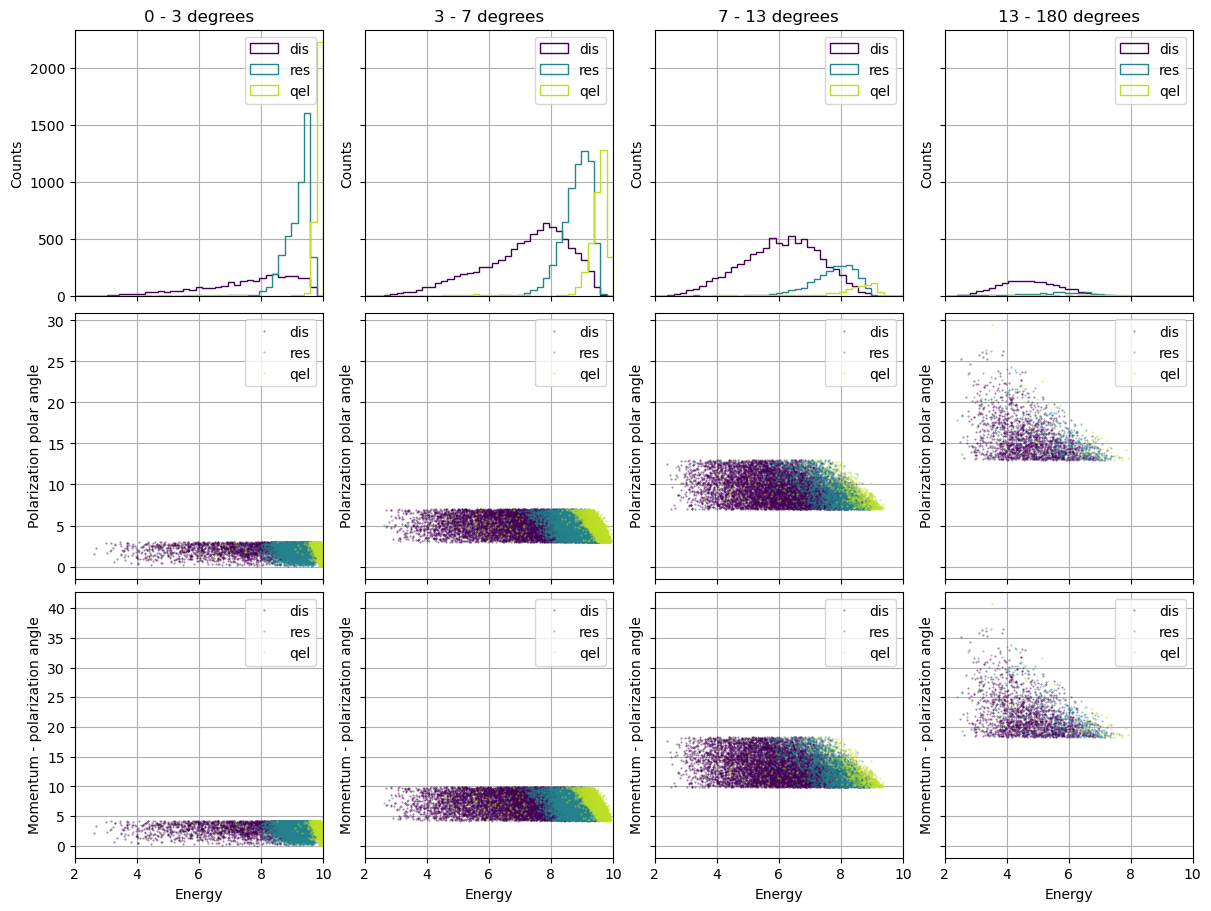

In [87]:
colors = plt.cm.viridis(np.linspace(0, 0.9, 3))

scattering_angle_range = (0, 3, 7, 13, 180) # degrees

fig, axs = plt.subplots(
    ncols=len(scattering_angle_range)-1, nrows=3, 
    figsize=(3*(len(scattering_angle_range)-1), 9), layout="constrained",
    sharex="all", sharey="row"
)
df = particle_infos[10]
ev = event_infos[10]

for ax, (theta_min, theta_max) in zip(axs.T, itertools.pairwise(scattering_angle_range)):
    for int_type, c in zip(("dis", "res", "qel"), colors):
        tau_all = df.query("pdg == 15")[ev[int_type].values]
        # Only select the taus that have a specific scattering angle
        tau_momentum_direction = tau_all[["px", "py", "pz"]].values / np.linalg.norm(tau_all[["px", "py", "pz"]].values, axis=1)[:, np.newaxis]
        tau_momentum_angle = np.arccos(tau_momentum_direction[:, 2]) * 180/np.pi
        
        angular_limits = (theta_min <= tau_momentum_angle) & (tau_momentum_angle < theta_max)
        tau_all = tau_all[angular_limits]
        tau_momentum_direction = tau_momentum_direction[angular_limits]
        # azimuth = 180/np.pi * np.arctan2(tau_all["polx"], tau_all["poly"])
        polar = 180/np.pi*np.arccos(tau_all["polz"])
        angle_between = 180/np.pi*np.arccos(np.sum(tau_momentum_direction * tau_all[["polx", "poly", "polz"]].values, axis=1))
        
        # Plot polar angle as a function of tau energy
        ax[0].hist(tau_all["E"], bins=np.linspace(2, 10, 40), label=int_type, histtype="step", color=c)
        ax[0].set(
            # xlabel="Energy", 
            ylabel="Counts",
            xlim=(2, 10), 
            title=f"{theta_min} - {theta_max} degrees",
        )

        ax[1].plot(tau_all["E"], polar, ".", color=c, label=int_type, markersize=1, alpha=0.5)
        ax[1].set(
            # xlabel="Energy",
            ylabel="Polarization polar angle",
            # ylim=(-1, -0.9),
        )

        ax[2].plot(tau_all["E"], angle_between, ".", label=int_type, color=c, markersize=1, alpha=0.5)
        ax[2].set(
            xlabel="Energy", 
            ylabel="Momentum - polarization angle",
            # ylim=(-1, -0.9),
        )
        
for a in axs.flat:
    a.legend()
    a.grid()

## Find events with strange branching fractions
These come from the Geant4 simulations due to some bug and should be removed manually from the files.

In [14]:
from utils import filter_events
import numba

@numba.njit
def strange_event(values, index):
    return (values == 11).sum() > 1

In [17]:
for e, p in particle_infos.items():
    selected_events = filter_events(p, "pdg", strange_event, engine="numba")
    if selected_events.shape[0] > 0:
        print(f"Energy: {e} GeV")
        print(selected_events)

Energy: 100 GeV
        event_num         pdg           E        px        py          pz  \
164224      26993  1000080160   14.895082  0.000000  0.000000    0.000000   
164225      26993          16  100.000000  0.000000  0.000000  100.000000   
164226      26993          15   73.950780 -3.333953  2.191839   73.821686   
164227      26993          11    1.311256 -0.050931  0.022902    1.310066   
164228      26993          11   10.496834 -0.630861  0.522362   10.464830   
164229      26993         -12   35.058680 -2.194256  0.682401   34.983290   
164230      26993          16   27.084062 -0.458585  0.964477   27.062998   

            polx      poly      polz  
164224       NaN       NaN       NaN  
164225  0.000000  0.000000  0.000000  
164226  0.029648  0.045096 -0.998543  
164227       NaN       NaN       NaN  
164228       NaN       NaN       NaN  
164229       NaN       NaN       NaN  
164230       NaN       NaN       NaN  


## Analysis of old IceCube simulation events

In [ ]:
# Load the event info
event_info = pd.read_csv("genie_tau_decays_event_info.csv")
particle_info = pd.read_csv("genie_tau_decays_particles.csv")

### 4-momentum conservation

In [4]:
particle_info.head(13)

,event_num,pdg,E,px,py,pz
0,0,1000080160,14.895081,0.000000,0.000000,0.000000
1,0,-16,3.730323,0.185260,3.295873,1.737299
2,0,-15,3.251366,-0.023894,2.329548,1.409583
3,0,211,0.726490,-0.435732,-0.013640,0.564145
4,0,-16,2.524877,0.411767,2.343313,0.845184
5,1,1000080160,14.895081,0.000000,0.000000,0.000000
6,1,16,3.725654,-1.656092,-2.943322,1.573121
7,1,15,2.846514,-0.845274,-1.491209,1.416815
8,1,-211,0.395154,-0.365821,-0.047146,0.024889
9,1,-211,2.062102,-0.284192,-1.660413,1.181121


In [5]:
# Check if there are any events where two taus are produced
# There should not be any
assert not (particle_info[np.abs(particle_info['pdg']) == 15].groupby("event_num").count() > 1).any().any()
taus = particle_info[np.abs(particle_info["pdg"]) == 15]
assert (taus["event_num"] == np.arange(len(taus))).all()

In [6]:
taus

,event_num,pdg,E,px,py,pz
2,0,-15,3.251366,-0.023894,2.329548,1.409583
7,1,15,2.846514,-0.845274,-1.491209,1.416815
14,2,15,3.332381,-2.127187,-1.737024,-0.636785
19,3,15,3.509529,-0.032933,-0.487587,-2.986784
26,4,15,3.555693,-0.230564,-0.218090,-3.063518
...,...,...,...,...,...,...
447098,76638,-15,1003.199894,-392.660182,-607.363024,-695.222992
447104,76639,15,5031.544231,-4776.946270,-1257.860435,-956.559277
447110,76640,-15,75.985685,56.916040,-50.301859,-0.977036
447116,76641,15,1999.051556,-973.289879,1030.714386,1409.446214


In [7]:
np.unique(
    np.isclose(
        particle_info
            .drop("pdg", axis=1)
            .groupby("event_num")
            .nth[3:]
            .groupby("event_num")
            .sum(), 
        taus
            .set_index("event_num")
            .drop("pdg", axis=1)
        , rtol=0.01)
    .sum(axis=1)
    , return_counts=True
)

(array([0, 1, 2, 3, 4]), array([18011,   568,    61,   493, 57510]))

The number in the first array indicates how many of the 4-momentum components are within the given relative tolerance (rtol), while the number in the second array correspond to how many events have that number of components within the given relative tolerance.

We have a large collection of 4 (all components close in value) and 0 (none of the components are close in value), with a few events in between.

It is good that most events are 4, since that means that the 4-momentum is conserved.

The ones with 0 correspond to when the electron is not in the event, but the electron neutrino and tau neutrino are.

We now want to check if only the electron is missing, or if there are other events that look strange.

In [8]:
no_e_events = (
    particle_info
    .groupby("event_num")
    .filter(
        lambda df: set(np.abs(df.iloc[3:, 1]).tolist()) != {12, 16}
    )
)

In [9]:
no_e_eventnum = no_e_events["event_num"].unique()
tau_no_e = taus[taus["event_num"].isin(no_e_eventnum)]

In [10]:
tau_no_e

,event_num,pdg,E,px,py,pz
2,0,-15,3.251366,-0.023894,2.329548,1.409583
7,1,15,2.846514,-0.845274,-1.491209,1.416815
19,3,15,3.509529,-0.032933,-0.487587,-2.986784
26,4,15,3.555693,-0.230564,-0.218090,-3.063518
31,5,-15,3.758840,0.426761,3.153622,-0.918877
...,...,...,...,...,...,...
447098,76638,-15,1003.199894,-392.660182,-607.363024,-695.222992
447104,76639,15,5031.544231,-4776.946270,-1257.860435,-956.559277
447110,76640,-15,75.985685,56.916040,-50.301859,-0.977036
447116,76641,15,1999.051556,-973.289879,1030.714386,1409.446214


In [11]:
np.unique(np.isclose(no_e_events.drop("pdg", axis=1).groupby("event_num").nth[3:].groupby("event_num").sum(), 
           tau_no_e.set_index("event_num").drop("pdg", axis=1), rtol=0.1).sum(axis=1), return_counts=True)

(array([0, 1, 3, 4]), array([ 3592,     7,    48, 57926]))

There are still quite a lot of events that are not conserved. These will have to be investigated further.

In [12]:
n_correct_4m_components = np.isclose(
    no_e_events.drop("pdg", axis=1).groupby("event_num").nth[3:].groupby("event_num").sum(), 
    tau_no_e.set_index("event_num").drop("pdg", axis=1), 
    rtol=0.1
).sum(axis=1)

incorrect_event_num = tau_no_e[n_correct_4m_components == 0]["event_num"]

In [13]:
remaining_incorrect_events = no_e_events[no_e_events["event_num"].isin(incorrect_event_num)]
remaining_incorrect_events.groupby("event_num").nth[3:]

,event_num,pdg,E,px,py,pz
85437,14462,16,0.455603,0.227081,0.366221,-0.147955
86869,14705,-16,1.741897,1.335788,-0.653086,0.907389
91144,15425,211,7.821918,4.661051,5.020981,3.771907
91145,15425,211,4.364382,2.741274,2.651072,2.117920
91146,15425,-16,1.072879,0.628553,0.511290,0.703260
...,...,...,...,...,...,...
447095,76637,16,1653.625432,1446.779545,-506.715352,620.117384
447111,76640,211,4.219130,3.109955,-2.847443,-0.042789
447112,76640,211,9.417698,7.102254,-6.182930,-0.053989
447113,76640,-16,29.920689,22.462416,-19.763846,0.279041


There seem to be mostly events where the tau decays to a tau neutrino and nothing else. 

I would guess that this is because the tau neutrino decays to two photons and a tau neutrino, and then the photons are not included.
Since there are two particles that are unknown, it is not possible to determine their 4-momenta. They of course share half the missing energy each, but their directions are not known.

In [14]:
# Example:
particle_info.query("event_num == 14462")

,event_num,pdg,E,px,py,pz
85434,14462,1000080160,14.895081,0.000000,0.000000,0.000000
85435,14462,16,32.364764,6.430823,23.039574,-21.801387
85436,14462,15,30.744208,5.603906,22.255583,-20.379756
85437,14462,16,0.455603,0.227081,0.366221,-0.147955


We now want to check the other events:

In [15]:
remaining_incorrect_events2 = (
    remaining_incorrect_events
    .groupby("event_num")
    .filter(
        lambda df: not (
            (len(df.iloc[3:, 1]) == 1) 
            and (np.abs(df.iloc[3, 1]) == 16)
        )
    )
)

In [16]:
remaining_incorrect_events2.groupby("event_num").filter(lambda df: sorted(np.abs(df.iloc[3:, 1]).tolist()) != [16, 211, 211])

,event_num,pdg,E,px,py,pz
91904,15555,1000080160,14.895081,0.000000,0.000000,0.000000
91905,15555,16,47.054507,-7.615202,-19.700151,-42.048061
91906,15555,15,43.495663,-6.100936,-18.933855,-38.639401
91907,15555,111,9.426505,-0.809797,-3.802363,-8.586445
91908,15555,16,2.649729,-0.410884,-1.350791,-2.242232
...,...,...,...,...,...,...
447007,76619,2212,0.938270,0.000000,0.000000,0.000000
447008,76619,16,1168.397089,-1108.226844,182.089858,322.223995
447009,76619,15,559.871910,-530.591632,82.873574,158.296837
447010,76619,-211,21.691559,-20.524020,3.361495,6.161916


In [17]:
set(tuple(a.tolist()) for i, a in remaining_incorrect_events2.groupby("event_num").nth[3:].groupby("event_num")["pdg"])

{(-211, -211, 16),
 (-211, -16),
 (-211, 16),
 (-211, 211, 16),
 (-16, 211),
 (16, -211),
 (111, -211, 16),
 (111, -16),
 (111, 16),
 (111, 111, -16),
 (111, 111, 16),
 (111, 211, -16),
 (211, -211, -16),
 (211, -16),
 (211, 16),
 (211, 211, -16)}

Decay modes that seem to be strange:

16

12, 16

211, 16

111, 16

211, 211, 16

111, 211, 16

111, 111, 16

111, 16: 15555
16: 14462
12, 16: 2



In [18]:
first_decay_product = particle_info.groupby("event_num").nth[3]
first_decay_product[first_decay_product["pdg"].abs() == 16]

,event_num,pdg,E,px,py,pz
85437,14462,16,0.455603,0.227081,0.366221,-0.147955
86869,14705,-16,1.741897,1.335788,-0.653086,0.907389
91563,15496,-16,1.900433,-1.141250,-1.146876,0.996930
93502,15822,-16,5.777562,-0.828564,5.506056,1.541767
95836,16219,-16,1.818010,-1.317725,1.229358,-0.239665
...,...,...,...,...,...,...
447066,76631,16,344.234924,-227.653441,208.804614,151.895446
447075,76633,16,373.356422,-254.399312,207.444290,-177.884442
447079,76634,16,504.537618,304.261142,-401.126038,32.882629
447095,76637,16,1653.625432,1446.779545,-506.715352,620.117384


### Charge conservation

In [19]:
particle_info.iloc[2:3, :]

,event_num,pdg,E,px,py,pz
2,0,-15,3.251366,-0.023894,2.329548,1.409583


In [20]:
# Check that for every event with a tau there is a tau neutrino, and vice versa for anti-tau
for event_num, df in particle_info.groupby("event_num"):
    second_neutrino_pdg = df.iloc[3:, 1][df.iloc[3:, 1].abs() == 16].iloc[0]
    print(second_neutrino_pdg)
    assert df.iloc[2, 1] * second_neutrino_pdg > 0
    break

-16


## Branching ratios
Check branching ratios of the various decay modes to see if it matches what we expect from e.g., PDG

In [21]:
c = Counter(tuple(sorted(a.tolist())) for i, a in particle_info.groupby("event_num").nth[2:].groupby("event_num")["pdg"])

In [22]:
n_taus = (particle_info["pdg"] == 15).sum()
n_anti_taus = (particle_info["pdg"] == -15).sum()
n_taus, n_anti_taus

(53172, 23471)

In [23]:
br = {}
for pdgs, n in c.items():
    if 15 in pdgs:
        br[(15, *pdgs[:pdgs.index(15)], *pdgs[pdgs.index(15)+1:])] = n / n_taus
    elif -15 in pdgs:
        br[(-15, *pdgs[:pdgs.index(-15)], *pdgs[pdgs.index(-15)+1:])] = n / n_anti_taus
    else:
        raise ValueError("No tau in the event")
br

{(-15, -16, 211): 0.11482254697286012,
 (15, -211, -211, 16, 211): 0.09958248702324532,
 (15, -12, 16): 0.19335364477544573,
 (15, -211, 16, 111, 111): 0.09832242533664334,
 (15, -211, 16): 0.11758068156172422,
 (-15, -16, 111, 111, 211): 0.09582037407865025,
 (-15, -16, 12): 0.20403902688424014,
 (15, -211, 16, 111): 0.26811103588354773,
 (15, -14, 13, 16): 0.18966749416986384,
 (-15, -16, 111, 211): 0.2654339397554429,
 (-15, -16, -13, 14): 0.1789016232797921,
 (-15, -211, -16, 211, 211): 0.10008095096076008,
 (15, -12, 11, 16): 0.0008651169788610547,
 (-15, -16, -11, 12): 0.0006390865323164757,
 (15, 16): 0.018712856390581508,
 (-15, -16): 0.024583528609773763,
 (-15, -16, 211, 211): 0.0017042307528439351,
 (15, 16, 111): 0.008369066425938465,
 (-15, -211, -16, 211): 0.003025009586297985,
 (-15, -16, 111, 111): 0.0012781730646329514,
 (15, -211, 16, 211): 0.0025765440457383585,
 (-15, -16, 111): 0.008819394145967364,
 (15, 16, 111, 111): 0.001184834123222749,
 (15, -211, -211, 16): 

In [24]:
pdg2name = {15: "tau-", 16: "nu_tau", 211: "pi+", -15: "tau+", -16: "nu_tau_bar", -211: "pi-", 111: "pi0", 13: "mu-", -13: "mu+", 14: "nu_mu", -14: "nu_mu_bar", 11: "e-", -11: "e+", 12: "nu_e", -12: "nu_e_bar"}

for pdgs, n in br.items():
    for pdg in pdgs:
        print(pdg2name[pdg], end=" ")
    print(":", n*100)

tau+ nu_tau_bar pi+ : 11.482254697286013
tau- pi- pi- nu_tau pi+ : 9.958248702324532
tau- nu_e_bar nu_tau : 19.335364477544573
tau- pi- nu_tau pi0 pi0 : 9.832242533664335
tau- pi- nu_tau : 11.758068156172422
tau+ nu_tau_bar pi0 pi0 pi+ : 9.582037407865025
tau+ nu_tau_bar nu_e : 20.403902688424015
tau- pi- nu_tau pi0 : 26.811103588354772
tau- nu_mu_bar mu- nu_tau : 18.966749416986385
tau+ nu_tau_bar pi0 pi+ : 26.543393975544287
tau+ nu_tau_bar mu+ nu_mu : 17.89016232797921
tau+ pi- nu_tau_bar pi+ pi+ : 10.008095096076008
tau- nu_e_bar e- nu_tau : 0.08651169788610547
tau+ nu_tau_bar e+ nu_e : 0.06390865323164757
tau- nu_tau : 1.8712856390581507
tau+ nu_tau_bar : 2.458352860977376
tau+ nu_tau_bar pi+ pi+ : 0.17042307528439352
tau- nu_tau pi0 : 0.8369066425938465
tau+ pi- nu_tau_bar pi+ : 0.3025009586297985
tau+ nu_tau_bar pi0 pi0 : 0.12781730646329514
tau- pi- nu_tau pi+ : 0.25765440457383587
tau+ nu_tau_bar pi0 : 0.8819394145967364
tau- nu_tau pi0 pi0 : 0.11848341232227488
tau- pi- pi- n

```
tau | decay products | branching ratio              | PDG
------------------------------------------------------------
tau+ nu_tau_bar pi+ : 11.482254697286013            10.8164
tau- pi- pi- nu_tau pi+ : 9.958248702324532         8.9868
tau- nu_e_bar nu_tau : 19.335364477544573           17.8175 x
tau- pi- nu_tau pi0 pi0 : 9.832242533664335         9.2595
tau- pi- nu_tau : 11.758068156172422                10.8164
tau+ nu_tau_bar pi0 pi0 pi+ : 9.582037407865025     9.2595 
tau+ nu_tau_bar nu_e : 20.403902688424015           17.8175 x
tau- pi- nu_tau pi0 : 26.811103588354772            25.4941
tau- nu_mu_bar mu- nu_tau : 18.966749416986385      17.3937
tau+ nu_tau_bar pi0 pi+ : 26.543393975544287        25.4941
tau+ nu_tau_bar mu+ nu_mu : 17.89016232797921       17.3937
tau+ pi- nu_tau_bar pi+ pi+ : 10.008095096076008    8.9868
tau- nu_e_bar e- nu_tau : 0.08651169788610547       17.8175 (same as above??)
tau+ nu_tau_bar e+ nu_e : 0.06390865323164757       17.8175 (same as above??)
tau- nu_tau : 1.8712856390581507                    0.6964 x
tau+ nu_tau_bar : 2.458352860977376                 0.6964 x
tau+ nu_tau_bar pi+ pi+ : 0.17042307528439352       ?
tau- nu_tau pi0 : 0.8369066425938465                0.4328 x
tau+ pi- nu_tau_bar pi+ : 0.3025009586297985        0.2927 x
tau+ nu_tau_bar pi0 pi0 : 0.12781730646329514       0.0647 x
tau- pi- nu_tau pi+ : 0.25765440457383587           0.2927 x
tau+ nu_tau_bar pi0 : 0.8819394145967364            0.4328 x
tau- nu_tau pi0 pi0 : 0.11848341232227488           0.0647 x
tau- pi- pi- nu_tau : 0.1260061686601971            ?
tau- nu_tau pi+ : 0.04137515985857218               ?
tau+ pi- nu_tau_bar : 0.08521153764219676           ?
```

In [25]:
pdg_brs = [
    10.8164,
    8.9868,
    17.8175,
    9.2595,
    10.8164,
    9.2595 ,
    17.8175,
    25.4941,
    17.3937,
    25.4941,
    17.3937,
    8.9868,
]

print("Tau, decay products, branching ratio (%), Poisson error (%), PDG branching ratio (%), difference (sigma)")
for i, ((pdgs, n_br), pdg_br) in enumerate(zip(c.items(), pdg_brs)):
    if i >= 12:
        break
    
    n = n_taus if 15 in pdgs else n_anti_taus
    print(pdgs, n_br / n * 100, np.sqrt(n_br)/n * 100, pdg_br, np.abs((n_br / n * 100 - pdg_br) / (np.sqrt(n_br)/n * 100)))

Tau, decay products, branching ratio (%), Poisson error (%), PDG branching ratio (%), difference (sigma)
(-16, -15, 211) 11.482254697286013 0.22118098679080414 10.8164 3.0104517885879014
(-211, -211, 15, 16, 211) 9.958248702324532 0.13685163365851494 8.9868 7.098553932856817
(-12, 15, 16) 19.335364477544573 0.19069297028829124 17.8175 7.959729586517288
(-211, 15, 16, 111, 111) 9.832242533664335 0.13598305485989032 9.2595 4.211866943675144
(-211, 15, 16) 11.758068156172422 0.14870531408087562 10.8164 6.332444553126609
(-16, -15, 111, 111, 211) 9.582037407865025 0.20205199099108478 9.2595 1.5963089810842659
(-16, -15, 12) 20.403902688424015 0.2948430024591361 17.8175 8.77213522739947
(-211, 15, 16, 111) 26.811103588354772 0.2245514414594042 25.4941 5.86504179084893
(-14, 13, 15, 16) 18.966749416986385 0.18886650999212168 17.3937 8.32889545664821
(-16, -15, 111, 211) 26.543393975544287 0.3362888204281218 25.4941 3.1202166465375054
(-16, -15, -13, 14) 17.89016232797921 0.276084066964721 17

The branching ratios match relatively well but compared to the PDG official branching ratios, most of them differ by > 4 sigma, which cannot be explained purely by low statstics. This either means that:
- the labeling is not correct for any of the processes
- the branching ratios in Geant4 differ quite significantly from the PDG branching ratios
- The PDG branching ratios differ because they take some kind of polarization into account
- The PDG branching ratios differ because the branching ratios must be weighted (see PDF). However, most branching ratios seem to have a coefficient of 1 anyway, so I do not think this has a large effect. Though I can be wrong.

In any case, the branching ratios do not differ from the PDG branching ratios by a factor of 2 or something like that (except for the questionable ones), so I can probably use them for comparisons with Tauola for now, until I have better samples.

### Nucleus

In [26]:
nucleus = particle_info.groupby("event_num").first()

In [27]:
nucleus.pdg.value_counts()

pdg
1000080160    69412
2212           7231
Name: count, dtype: int64

In [4]:
69412 / (69412 + 7231), 7231 / (69412 + 7231)

(0.9056534843364691, 0.09434651566353092)

In [28]:
nucleus.E.value_counts()

E
14.895081    69412
0.938270      7231
Name: count, dtype: int64

We mostly have interactions with the oxygen nucleus, but we also have a few with a proton, i.e., hydrogen nucleus. This looks reasonable.

The energy is also what we expect.

### Tau energy

In [29]:
taus = particle_info[particle_info["pdg"] == 15]
anti_taus = particle_info[particle_info["pdg"] == -15]

In [30]:
taus["E"].min(), taus["E"].max()

(2.2156010004372018, 9188.968005893275)

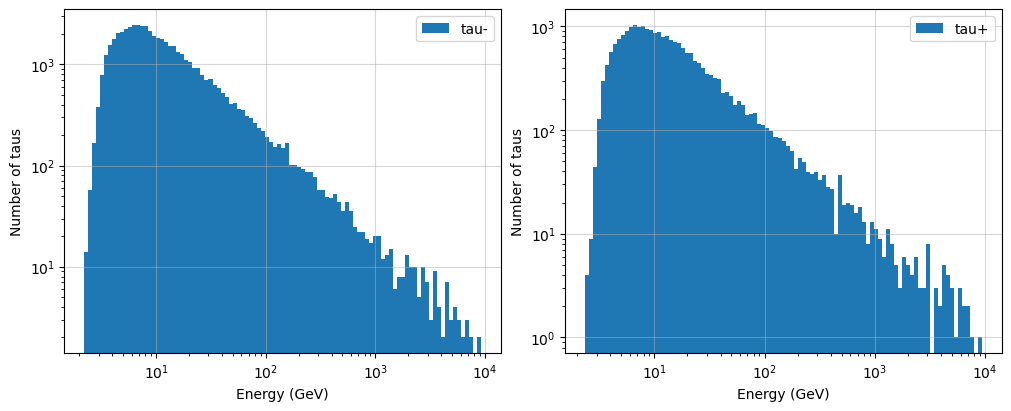

In [31]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2, layout="constrained")

ax1.hist(taus["E"], bins=np.geomspace(taus["E"].min(), taus["E"].max(), 100), label="tau-")
ax2.hist(anti_taus["E"], bins=np.geomspace(anti_taus["E"].min(), anti_taus["E"].max(), 100), label="tau+")

for ax in (ax1, ax2):
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of taus")
    ax.grid(True, alpha=0.5)
    ax.legend()

In [32]:
nutaus = particle_info.groupby("event_num").nth(1)
anti_nutaus = nutaus.query("pdg == -16")
nutaus = nutaus.query("pdg == 16")

In [33]:
particle_info.groupby("event_num").nth(1)["pdg"].value_counts()

pdg
 16    53172
-16    23471
Name: count, dtype: int64

In [34]:
# Check that tau*nutau PDG is always greater than 0, i.e., they have the same sign
assert ((nutaus["pdg"].values * taus["pdg"].values) > 0).all()
assert ((anti_nutaus["pdg"].values * anti_taus["pdg"].values) > 0).all()

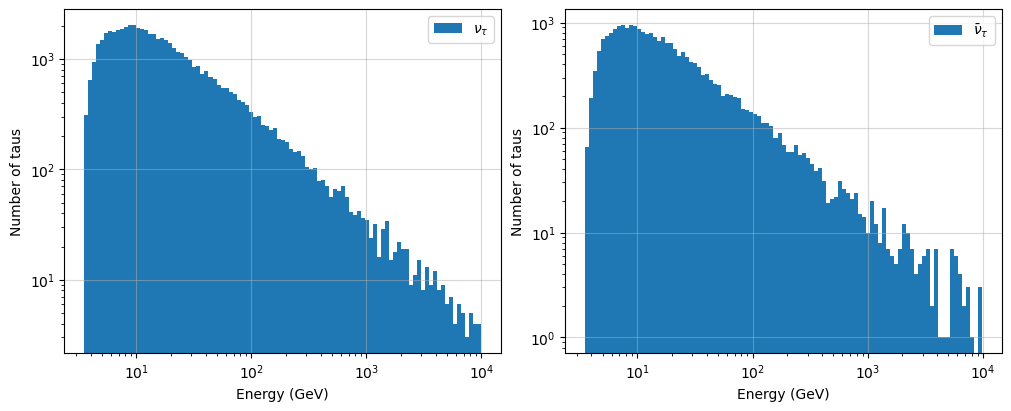

In [35]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2, layout="constrained")

ax1.hist(nutaus["E"], bins=np.geomspace(nutaus["E"].min(), nutaus["E"].max(), 100), label=r"$\nu_\tau$")
ax2.hist(anti_nutaus["E"], bins=np.geomspace(anti_nutaus["E"].min(), anti_nutaus["E"].max(), 100), label=r"$\bar\nu_\tau$")

for ax in (ax1, ax2):
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of taus")
    ax.grid(True, alpha=0.5)
    ax.legend()

$\nu_\tau$ and $\tau$ energy distributions are similar. We are mostly interested in the low-energy events, where the energy is < 50 GeV.

## Analyze event information
Just for sanity checks

In [36]:
event_info.sum(axis=0)

event_num    2.937036e+09
cc           7.664300e+04
dis          4.067000e+04
qel          1.594000e+04
res          2.001700e+04
xsec         8.392645e+06
dtype: float64

There seems to be the same order of magnitude of DIS, QEL and RES events, with a majority of DIS events.

In [37]:
event_info["cc"].all()

True

All events are CC, which is good since those are the only ones we are interested in.

# Only tau decays
The file analyzed below are only simulations of tau particles decaying in Geant4, i.e., no neutrinos interacting with ice in GENIE first.
This is mainly (or only) useful for checking decay branching ratios.

In [2]:
tau_decays = pd.read_csv("tau_decays_159007_particles.csv")

In [7]:
c = Counter(tuple(sorted(a.tolist())) for i, a in tau_decays.groupby("event_num")["pdg"])

In [9]:
n_taus = (tau_decays["pdg"] == 15).sum()
n_anti_taus = (tau_decays["pdg"] == -15).sum()
n_taus, n_anti_taus

(38916, 0)

In [10]:
br = {}
for pdgs, n in c.items():
    if 15 in pdgs:
        br[(15, *pdgs[:pdgs.index(15)], *pdgs[pdgs.index(15)+1:])] = n / n_taus
    elif -15 in pdgs:
        br[(-15, *pdgs[:pdgs.index(-15)], *pdgs[pdgs.index(-15)+1:])] = n / n_anti_taus
    else:
        raise ValueError("No tau in the event")
br

{(15, -211, 16, 111): 0.2877993627299825,
 (15, -211, 16): 0.11039161270428616,
 (15, -211, -211, 16, 211): 0.0953078425326344,
 (15, -14, 13, 16): 0.19727104532839962,
 (15, -12, 11, 16): 0.2049799568300956,
 (15, -211, 16, 111, 111): 0.10425017987460171}

Source: https://geant4-userdoc.web.cern.ch/UsersGuides/ForApplicationDeveloper/html/TrackingAndPhysics/AllResources/TrackingAndPhysics/particleList.src/leptons/tau-.html and https://github.com/Geant4/geant4/blob/master/source/particles/leptons/src/G4TauMinus.cc

| Decay mode | Branching ratio in code | Branching ratio in simulation | 
| --- | -- |-- |
13, -14 | 0.1736         | 0.19727104532839962
11, -12 | 0.1784         | 0.2049799568300956
-211 | 0.1106            | 0.11039161270428616
-211, 111 | 0.2541       | 0.2877993627299825
-211, 111, 111| 0.0917  | 0.10425017987460171
-211, -211, 211 | 0.0946 |  0.0953078425326344
Total | 0.903 | 1.0

In [2]:
sum([2.5410000e-01,1.7840000e-01,1.7360000e-01,1.1060000e-01,9.4600000e-02,9.1700000e-02])

0.903

In [1]:
0.1736 + 0.1784 + 0.1106 + 0.2541 + 0.0917 + 0.0946

0.903

In [11]:
pdg2name = {15: "tau-", 16: "nu_tau", 211: "pi+", -15: "tau+", -16: "nu_tau_bar", -211: "pi-", 111: "pi0", 13: "mu-", -13: "mu+", 14: "nu_mu", -14: "nu_mu_bar", 11: "e-", -11: "e+", 12: "nu_e", -12: "nu_e_bar"}

for pdgs, n in br.items():
    for pdg in pdgs:
        print(pdg2name[pdg], end=" ")
    print(":", n*100)

tau- pi- nu_tau pi0 : 28.779936272998253
tau- pi- nu_tau : 11.039161270428616
tau- pi- pi- nu_tau pi+ : 9.53078425326344
tau- nu_mu_bar mu- nu_tau : 19.727104532839963
tau- nu_e_bar e- nu_tau : 20.49799568300956
tau- pi- nu_tau pi0 pi0 : 10.425017987460171


Check 4-momentum conservation:

In [14]:
# Check if there are any events where two taus are produced
# There should not be any
assert not (tau_decays[np.abs(tau_decays['pdg']) == 15].groupby("event_num").count() > 1).any().any()
taus = tau_decays[np.abs(tau_decays["pdg"]) == 15]
assert (taus["event_num"] == np.arange(len(taus))).all()

In [15]:
taus

,event_num,pdg,E,px,py,pz
0,0,15,2.77682,-0.0,-0.0,2.133926
4,1,15,2.77682,-0.0,-0.0,2.133926
7,2,15,2.77682,-0.0,-0.0,2.133926
11,3,15,2.77682,-0.0,-0.0,2.133926
16,4,15,2.77682,-0.0,-0.0,2.133926
...,...,...,...,...,...,...
159113,38911,15,101.77682,-0.0,-0.0,101.761309
159117,38912,15,101.77682,-0.0,-0.0,101.761309
159122,38913,15,101.77682,-0.0,-0.0,101.761309
159126,38914,15,101.77682,-0.0,-0.0,101.761309


In [23]:
np.unique(
    np.isclose(
        tau_decays
            .drop("pdg", axis=1)
            .groupby("event_num")
            .nth[1:]
            .groupby("event_num")
            .sum(), 
        taus
            .set_index("event_num")
            .drop("pdg", axis=1)
        , atol=0.01)
    .sum(axis=1)
    , return_counts=True
)

(array([2, 4]), array([   40, 38876]))